<h1>1201, status summary and conclusion</h1>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import os
import numpy as np
import tensorflow as tf # changed to intel-optimized build
%load_ext tensorboard

tf.random.set_seed(42)
np.random.seed(42)

import shutil
import gc
import time
import datetime
import random
from winsound import Beep
from PIL import Image
import pickle
def beep():
    Beep(1000, 100)
    
beep()
# %load_ext tensorboard
# %reload_ext tensorboard

In [3]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [12,8]

In [4]:
addr = r"C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\env"
os.chdir(addr)

<h1>load super-expanded training data</h1>

In [6]:
with open('f_data.pkl', 'rb') as f:
    [train_x, val_x, test_x, train_y, val_y, test_y] = pickle.load(f)
beep()

<h1>sample training data</h1>

In [7]:
# sample training data
n = len(train_x)
sn = int(n / 10)
np.random.seed(42)
index = np.random.choice([i for i in range(n)], size=sn, replace=False)

sub_tx, sub_ty = [], []

for ind in index:
    sub_tx.append(train_x[ind])
    sub_ty.append(train_y[ind])

sub_tx = np.array(sub_tx)
sub_ty = np.array(sub_ty)
sub_tx = sub_tx.reshape(np.shape(sub_tx)[0], np.shape(sub_tx)[1], np.shape(sub_tx)[2], 1)

beep()

gc.collect()

0

<h1>Useful functions:</h1>

In [11]:
# ######################################################################################
# ## delete all tensorboard logs: (it gets messy when there are too many files)
# p = './logs/'
# shutil.rmtree(p, ignore_errors=True)

<h1>garbage collect</h1>

In [8]:
gc.collect()

0

<h1>Build Network models</h1>

In [13]:
def build_adam_model_1129(
    lmbda,
    n_eph,
    batch_size,
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    input_shape=(28, 28, 1),
    hidden_activation=tf.nn.relu,
    out_activation=tf.nn.softmax
    ):
    #############################################################
    tf.random.set_seed(42)
    #############################################################
    print('lmbda= {}\n'.format(lmbda))
    print('n_eph= {}\n'.format(n_eph))
    print('batch_size= {}\n'.format(batch_size))
    print('learning_rate= {}\n'.format(learning_rate))
    print('beta_1= {}\n'.format(beta_1))
    print('beta_2= {}\n'.format(beta_2))
    print('epsilon= {}\n'.format(epsilon))
    #############################################################
    
    model = tf.keras.models.Sequential()

    model.add(
        tf.keras.layers.Conv2D( # no padding
            32,
            (5,5),
            activation=hidden_activation,
            kernel_regularizer=tf.keras.regularizers.L2(
                l2=lmbda
            ),
            input_shape=input_shape
        )
    )

    model.add(
        tf.keras.layers.MaxPool2D(
            pool_size=(3,3), # following example of Kingma & Ba, arXiv:1412.6980v9
            strides=(2,2)
        )
    )

    model.add(
        tf.keras.layers.Conv2D( # no padding
            32,
            (5,5),
            activation=hidden_activation,
            kernel_regularizer=tf.keras.regularizers.L2(
                l2=lmbda
            )
        )
    )

    model.add(
        tf.keras.layers.MaxPool2D(
            pool_size=(2,2),
            strides=(2,2)
        )
    )

    model.add(
        tf.keras.layers.Flatten()
    )

    model.add(
        tf.keras.layers.Dense(
            1000,
            activation=hidden_activation,
            kernel_regularizer=tf.keras.regularizers.L2(
                l2=lmbda
            )
        )
    )

    model.add(
        tf.keras.layers.Dense(
            10,
            activation=out_activation
        )
    )

    ################################################################
    optimizer_adam = tf.keras.optimizers.Adam(
        learning_rate=learning_rate,
        beta_1=beta_1,
        beta_2=beta_2,
        epsilon=epsilon,
        amsgrad=amsgrad,
        name='Adam'
    )
    ################################################################
    # compile model
    model.compile(
        optimizer=optimizer_adam,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    ################################################################
    model.summary()
    ################################################################
    return model
    
Beep(1000,100)


<h1>Result from 1129 showed that there may be problem with the above conv. layer setup.</h1>
<h2>I would like to try some different layer designs and see if they show any improvements.</h2>

<h3>first, have a look at yesterday's model:</h3>

In [12]:
# model = tf.keras.models.Sequential()

# model.add(
#     tf.keras.layers.Conv2D( # no padding
#         32,
#         (5,5),
#         activation=hidden_activation,
#         kernel_regularizer=tf.keras.regularizers.L2(
#             l2=lmbda
#         ),
#         input_shape=input_shape
#     )
# )

# model.add(
#     tf.keras.layers.MaxPool2D(
#         pool_size=(3,3), # following example of Kingma & Ba, arXiv:1412.6980v9
#         strides=(2,2)
#     )
# )

# model.add(
#     tf.keras.layers.Conv2D( # no padding
#         32,
#         (5,5),
#         activation=hidden_activation,
#         kernel_regularizer=tf.keras.regularizers.L2(
#             l2=lmbda
#         )
#     )
# )

# model.add(
#     tf.keras.layers.MaxPool2D(
#         pool_size=(2,2),
#         strides=(2,2)
#     )
# )

# model.add(
#     tf.keras.layers.Flatten()
# )

# model.add(
#     tf.keras.layers.Dense(
#         1000,
#         activation=hidden_activation,
#         kernel_regularizer=tf.keras.regularizers.L2(
#             l2=lmbda
#         )
#     )
# )

# model.add(
#     tf.keras.layers.Dense(
#         10,
#         activation=out_activation
#     )
# )



<h2>I think 4 things may be changed:</h2>
<h3>1. number of filters in each Conv2D layer</h3>
<h3>2. conv. size</h3>
<h3>2. pooling size</h3>
<h3>2. total number of Conv2D layers<h3/>
    
    
<h2>I think pooling size should be small for this problem to capture fine details.</h2>
<h2>I don't know how number of filters would impact performance, so this is worth experimenting.</h2>


<h1>First, I want to change the pooling size to 2x2 and compare it to yesterday's short training benchmark:</h1>

In [10]:

def build_adam_model_1130_try_layers(
    input_shape,
    filter_1, kernel_1, pool___1, stride_1,
    filter_2, kernel_2, pool___2, stride_2,
    dense__1,
    hidden_activation,
    out_activation
    ):
    model = tf.keras.models.Sequential()
    model.add(
        tf.keras.layers.Conv2D( # no padding
            filter_1,
            kernel_1,
            activation=hidden_activation,
            kernel_regularizer=tf.keras.regularizers.L2(
                l2=lmbda
            ),
            input_shape=input_shape
        )
    )
    model.add(
        tf.keras.layers.MaxPool2D(
            pool_size=pool___1,
            strides=stride_1,
        )
    )
    model.add(
        tf.keras.layers.Conv2D( # no padding
            filter_2,
            kernel_2,
            activation=hidden_activation,
            kernel_regularizer=tf.keras.regularizers.L2(
                l2=lmbda
            )
        )
    )
    model.add(
        tf.keras.layers.MaxPool2D(
            pool_size=pool___2,
            strides=stride_2
        )
    )
    model.add(
        tf.keras.layers.Flatten()
    )
    model.add(
        tf.keras.layers.Dense(
            dense__1,
            activation=hidden_activation,
            kernel_regularizer=tf.keras.regularizers.L2(
                l2=lmbda
            )
        )
    )
    model.add(
        tf.keras.layers.Dense(
            10,
            activation=out_activation
        )
    )
    return model


def compile_adam_model_1130_try_layers(
    lmbda,
    n_eph,
    batch_size,
    learning_rate,
    beta_1,
    beta_2,
    epsilon,
    amsgrad,
    input_shape,
    hidden_activation,
    out_activation,
    filter_1, kernel_1, pool___1, stride_1,
    filter_2, kernel_2, pool___2, stride_2,
    dense__1
    ):
    #############################################################
    tf.random.set_seed(42)
    #############################################################
    print('lmbda= {}\n'.format(lmbda))
    print('n_eph= {}\n'.format(n_eph))
    print('batch_size= {}\n'.format(batch_size))
    print('learning_rate= {}\n'.format(learning_rate))
    print('beta_1= {}\n'.format(beta_1))
    print('beta_2= {}\n'.format(beta_2))
    print('epsilon= {}\n'.format(epsilon))
    #############################################################
    model = build_adam_model_1130_try_layers(
        input_shape,
        filter_1, kernel_1, pool___1, stride_1,
        filter_2, kernel_2, pool___2, stride_2,
        dense__1,
        hidden_activation,
        out_activation,
    )
    ################################################################
    optimizer_adam = tf.keras.optimizers.Adam(
        learning_rate=learning_rate,
        beta_1=beta_1,
        beta_2=beta_2,
        epsilon=epsilon,
        amsgrad=amsgrad,
        name='Adam'
    )
    ################################################################
    # compile model
    model.compile(
        optimizer=optimizer_adam,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    ################################################################
    model.summary()
    ################################################################
    return model
    
Beep(1000,100)


In [11]:
def train_cnn_adam_tensorboardCB( # using default ADAM params
        lmbda,
        batch_size,
        n_eph,
        train_x, train_y,
        val_x, val_y,
        test_x, test_y,
        addr,
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,
        amsgrad=False,
        input_shape=(28, 28, 1),
        hidden_activation=tf.nn.relu,
        out_activation=tf.nn.softmax,
        load_model_path=None,
        filter_1=32,
        kernel_1=(5,5),
        pool___1=(6,6),
        stride_1=(2,2),
        filter_2=32,
        kernel_2=(5,5),
        pool___2=(2,2),
        stride_2=(2,2),
        dense__1=1000
    ):
    
    ################################################################
    #  set time stamp:
    stamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

    ################################################################
    #  set checkpointCB
    checkpoint_filepath = addr + '\{}'.format(stamp)
    print('checkpoint_filepath:',checkpoint_filepath)
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)

    ################################################################
    #  set tensorboardCB
    log_dir = "logs/fit/" + stamp
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    if load_model_path is not None:
        model = tf.keras.models.load_model(load_model_path) 

    else:
        ################################################################
        # build model
        model = compile_adam_model_1130_try_layers(
                    lmbda,
                    n_eph,
                    batch_size,
                    learning_rate=learning_rate,
                    beta_1=beta_1,
                    beta_2=beta_2,
                    epsilon=epsilon,
                    amsgrad=amsgrad,
                    input_shape=input_shape,
                    hidden_activation=hidden_activation,
                    out_activation=out_activation,
                    filter_1=filter_1,
                    kernel_1=kernel_1,
                    pool___1=pool___1,
                    stride_1=stride_1,
                    filter_2=filter_2,
                    kernel_2=kernel_2,
                    pool___2=pool___2,
                    stride_2=stride_2,
                    dense__1=dense__1
        )
        
    ################################################################
    #    train model  
    ts = time.time()
    history = model.fit(
        train_x, train_y, 
        epochs=n_eph,
        batch_size=batch_size,
        validation_data=(val_x, val_y),
        callbacks=[model_checkpoint_callback, tensorboard_callback],
        shuffle=True
    )
    te = time.time()
    ################################################################

    
    ################################################################
    # summarize time and history
    print('total time:', te - ts)
    acc = history.history['accuracy']; print('\nacc', acc)
    loss = history.history['loss']; print('\nloss', loss)
    val_acc = history.history['val_accuracy']; print('\nval_acc', val_acc)
    val_loss = history.history['val_loss']; print('\nval_loss', val_loss)
    print()
    ################################################################
    ################################################################
    #    evaluate test data at the best epoch
    model.load_weights(checkpoint_filepath).expect_partial()
    [test_data_loss, test_data_accuracy] = model.evaluate(
        test_x, test_y,
        batch_size=len(test_x)
    )
    
    ################################################################
    ################################################################
    #    visualize result
    plt.plot(acc, label='train acc., best: {:.3f}'.format(max(acc)))
    plt.plot(val_acc, label='validation acc. best: {:.3f}'.format(max(val_acc)))
    plt.title('CNN relu, expanded train data, ADAM, lmbda={}, {} epochs'.format(lmbda, n_eph))
    plt.axvline(x=np.argmax(val_acc), c='r', ls=':', label='best epoch: {}'.format(np.argmax(val_acc)))
    plt.axhline(y=test_data_accuracy, c='r', label='test data accuracy at best epoch: {:.3f}'.format(test_data_accuracy))
    plt.legend()
    plt.show()
    gc.collect()
    Beep(1000, 100)
    print('log_dir:', log_dir)
    
    
    
    return log_dir

Beep(1000,100)
%reload_ext tensorboard

<h1><h1>
<h1>Repeat yesterday's result to see if my code has any bugs</h1>

In [11]:

lmbda = 0.1 / 10 / 10 / 10
batch_size = 1000
n_eph = 40


tb_path = train_cnn_adam_tensorboardCB(
    lmbda,
    batch_size,
    n_eph,
#     train_x, train_y,
    sub_tx, sub_ty,
    val_x, val_y,
    test_x, test_y,
    addr,
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    input_shape=(28, 28, 1),
    hidden_activation=tf.nn.relu,
    out_activation=tf.nn.softmax,
    load_model_path=None,
    filter_1=32,
    kernel_1=(5,5),
    pool___1=(3,3), # yesterday's benchmark
    stride_1=(2,2),
    filter_2=32,
    kernel_2=(5,5),
    pool___2=(2,2),
    stride_2=(2,2),
    dense__1=1000
)

%reload_ext tensorboard
%tensorboard --logdir logs/fit --host localhost


checkpoint_filepath: C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\env\20211130-173118
lmbda= 0.0001

n_eph= 40

batch_size= 1000

learning_rate= 0.001

beta_1= 0.9

beta_2= 0.999

epsilon= 1e-07

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
__________________________________________________

KeyboardInterrupt: 

<h2>yesterday's benchmark:</h2>

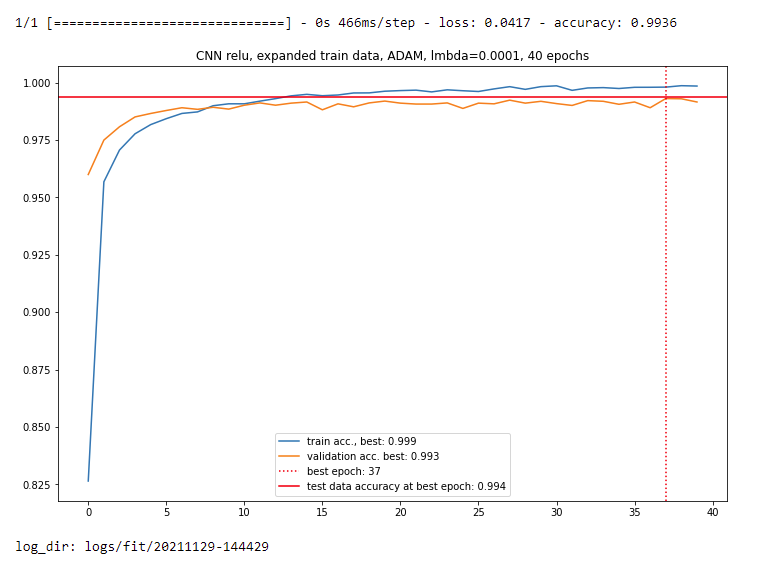

<h2>today's benchmark:</h2>

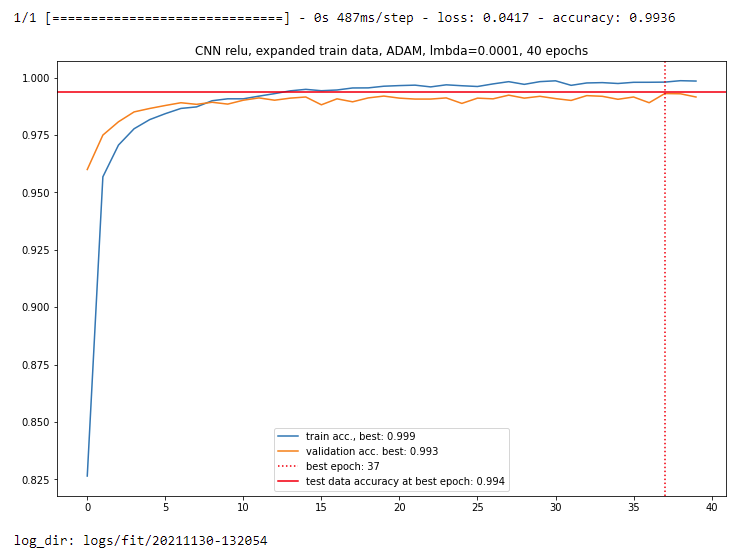

<h1>results check out, we can continue</h1>

<h1></h1>
<h1>change pool1 size to 2x2:</h1>

checkpoint_filepath: C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\env\20211130-133025
lmbda= 0.0001

n_eph= 40

batch_size= 1000

learning_rate= 0.001

beta_1= 0.9

beta_2= 0.999

epsilon= 1e-07

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
________________________________________________

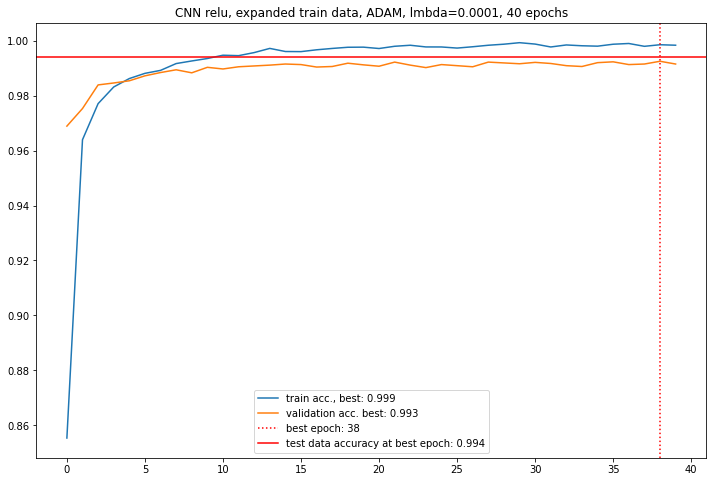

log_dir: logs/fit/20211130-133025


Reusing TensorBoard on port 6006 (pid 16568), started 2:43:20 ago. (Use '!kill 16568' to kill it.)

In [15]:

lmbda = 0.1 / 10 / 10 / 10
batch_size = 1000
n_eph = 40


tb_path = train_cnn_adam_tensorboardCB(
    lmbda,
    batch_size,
    n_eph,
#     train_x, train_y,
    sub_tx, sub_ty,
    val_x, val_y,
    test_x, test_y,
    addr,
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    input_shape=(28, 28, 1),
    hidden_activation=tf.nn.relu,
    out_activation=tf.nn.softmax,
    load_model_path=None,
    filter_1=32,
    kernel_1=(5,5),
    pool___1=(2,2), # experiment
    stride_1=(2,2),
    filter_2=32,
    kernel_2=(5,5),
    pool___2=(2,2),
    stride_2=(2,2),
    dense__1=1000
)

%reload_ext tensorboard
%tensorboard --logdir logs/fit --host localhost


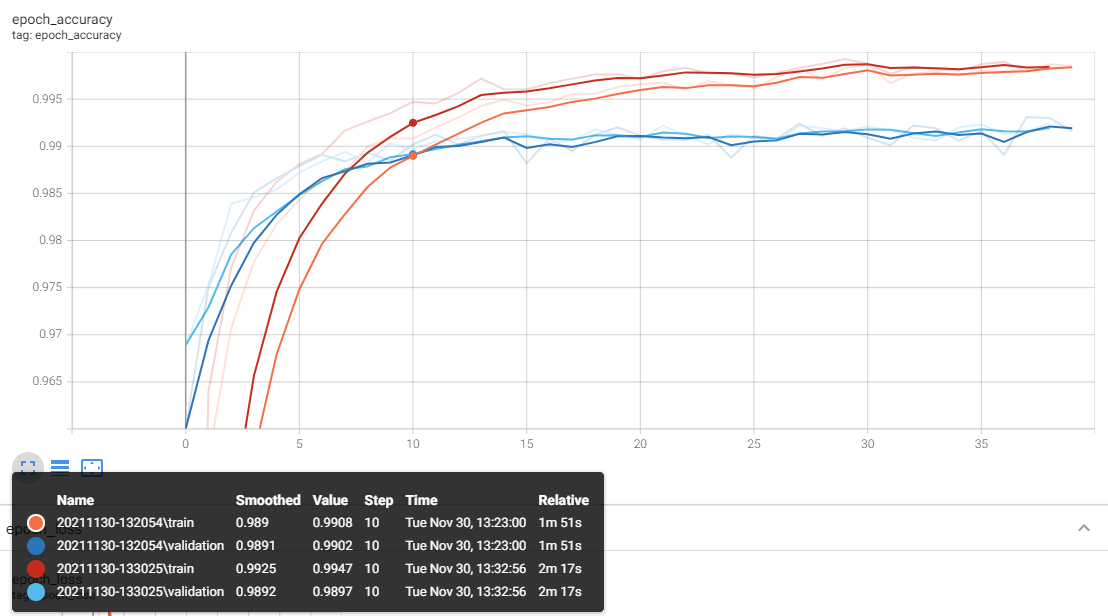

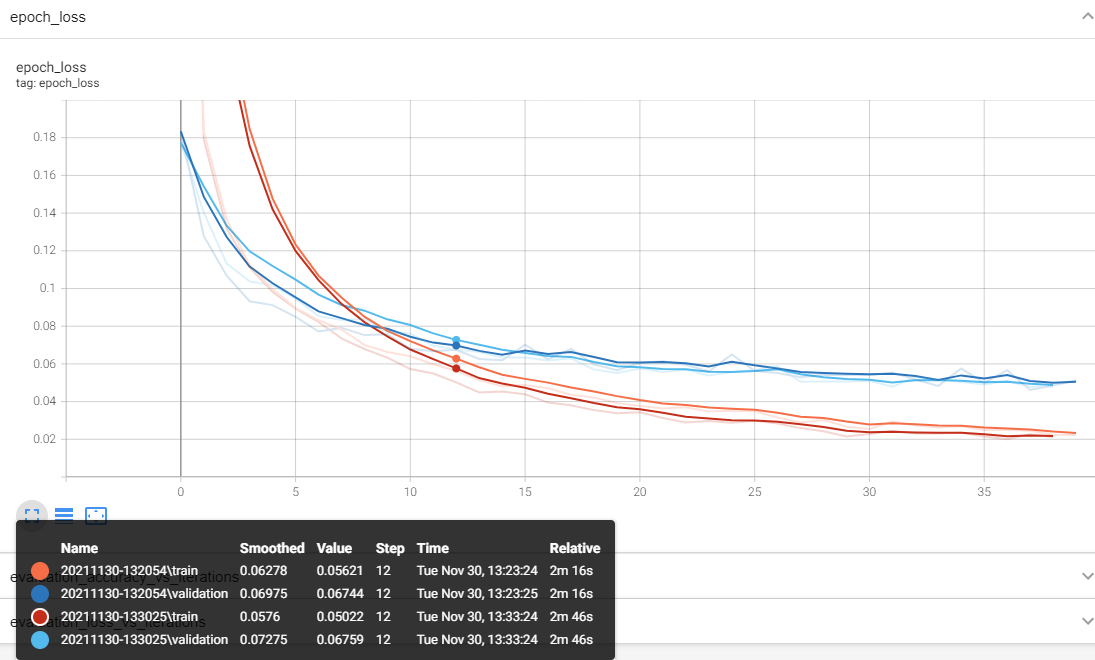

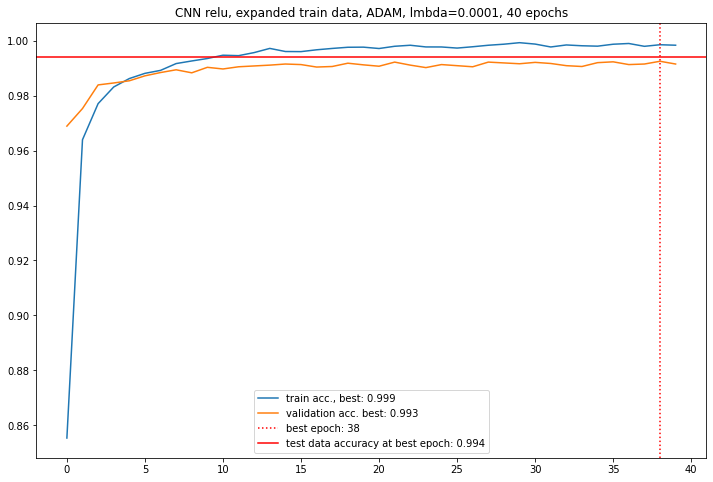

<h3>133025, 132054 : poolsize=(3,3), poolsize=(2,2).</h3>
<h3>Test Accuracy: (3,3), (2,2) : 99.36%, 99.39%.</h3>
<h3>poolsize=(2,2)'s training accuracy seems to grow faster, and validation cost seems to be a little lower than (3,3).</h3>
<h3>the difference is too small for me to make any judgements.</h3>



<h1>What if we increase the pooling size?</h1>

checkpoint_filepath: C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\env\20211130-135727
lmbda= 0.0001

n_eph= 40

batch_size= 1000

learning_rate= 0.001

beta_1= 0.9

beta_2= 0.999

epsilon= 1e-07

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 288)               0         
________________________________________________

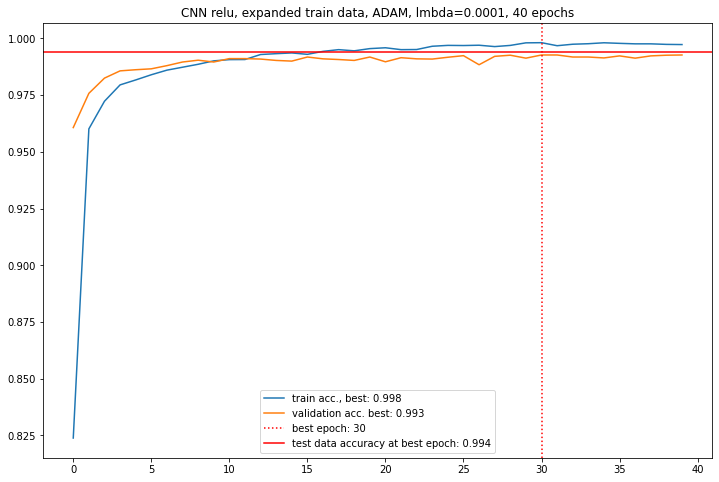

log_dir: logs/fit/20211130-135727


Reusing TensorBoard on port 6006 (pid 16568), started 3:08:39 ago. (Use '!kill 16568' to kill it.)

In [19]:

lmbda = 0.1 / 10 / 10 / 10
batch_size = 1000
n_eph = 40


tb_path = train_cnn_adam_tensorboardCB(
    lmbda,
    batch_size,
    n_eph,
#     train_x, train_y,
    sub_tx, sub_ty,
    val_x, val_y,
    test_x, test_y,
    addr,
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    input_shape=(28, 28, 1),
    hidden_activation=tf.nn.relu,
    out_activation=tf.nn.softmax,
    load_model_path=None,
    filter_1=32,
    kernel_1=(5,5),
    pool___1=(6,6), # experiment, 2X benchmark
    stride_1=(2,2),
    filter_2=32,
    kernel_2=(5,5),
    pool___2=(2,2),
    stride_2=(2,2),
    dense__1=1000
)

%reload_ext tensorboard
%tensorboard --logdir logs/fit --host localhost


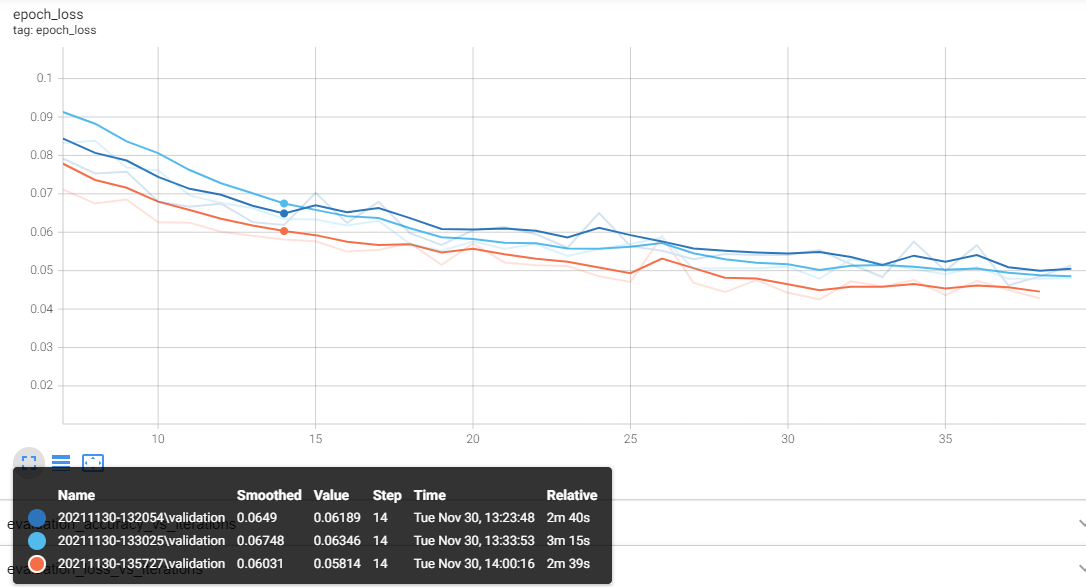

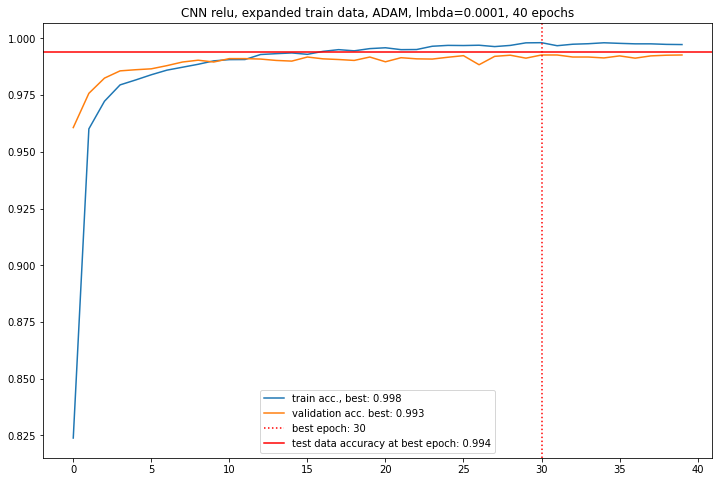

<h3>135727, 133025, 132054 : poolsize=(6,6), poolsize=(3,3), poolsize=(2,2).</h3>
<h3>Test Accuracy: (6,6), (3,3), (2,2) : 99.40% 99.36%, 99.39%.</h3>
<h3>poolsize=(6,6)'s validation cost seems to be the lowest of 3.<h3/>



<h1>What if we increase the pooling size even more?</h1>

checkpoint_filepath: C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\env\20211130-141558
lmbda= 0.0001

n_eph= 40

batch_size= 1000

learning_rate= 0.001

beta_1= 0.9

beta_2= 0.999

epsilon= 1e-07

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 32)          25632     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
________________________________________________

Epoch 33/40
75/75 [==============================] - 9s 114ms/step - loss: 0.0309 - accuracy: 0.9953 - val_loss: 0.0540 - val_accuracy: 0.9886
Epoch 34/40
75/75 [==============================] - 9s 123ms/step - loss: 0.0308 - accuracy: 0.9953 - val_loss: 0.0538 - val_accuracy: 0.9889
Epoch 35/40
75/75 [==============================] - 8s 113ms/step - loss: 0.0307 - accuracy: 0.9956 - val_loss: 0.0483 - val_accuracy: 0.9912
Epoch 36/40
75/75 [==============================] - 8s 109ms/step - loss: 0.0315 - accuracy: 0.9948 - val_loss: 0.0478 - val_accuracy: 0.9910
Epoch 37/40
75/75 [==============================] - 8s 112ms/step - loss: 0.0287 - accuracy: 0.9959 - val_loss: 0.0499 - val_accuracy: 0.9898
Epoch 38/40
75/75 [==============================] - 8s 105ms/step - loss: 0.0267 - accuracy: 0.9967 - val_loss: 0.0455 - val_accuracy: 0.9906
Epoch 39/40
75/75 [==============================] - 8s 110ms/step - loss: 0.0284 - accuracy: 0.9959 - val_loss: 0.0466 - val_accuracy: 0.9900

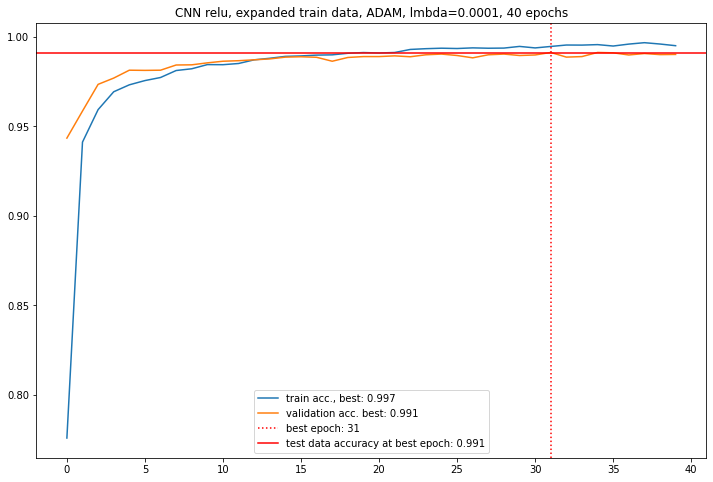

log_dir: logs/fit/20211130-141558


Reusing TensorBoard on port 6006 (pid 16568), started 3:25:49 ago. (Use '!kill 16568' to kill it.)

In [21]:

lmbda = 0.1 / 10 / 10 / 10
batch_size = 1000
n_eph = 40


tb_path = train_cnn_adam_tensorboardCB(
    lmbda,
    batch_size,
    n_eph,
#     train_x, train_y,
    sub_tx, sub_ty,
    val_x, val_y,
    test_x, test_y,
    addr,
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    input_shape=(28, 28, 1),
    hidden_activation=tf.nn.relu,
    out_activation=tf.nn.softmax,
    load_model_path=None,
    filter_1=32,
    kernel_1=(5,5),
    pool___1=(9,9), # experiment, 3X benchmark
    stride_1=(2,2),
    filter_2=32,
    kernel_2=(5,5),
    pool___2=(2,2),
    stride_2=(2,2),
    dense__1=1000
)

%reload_ext tensorboard
%tensorboard --logdir logs/fit --host localhost


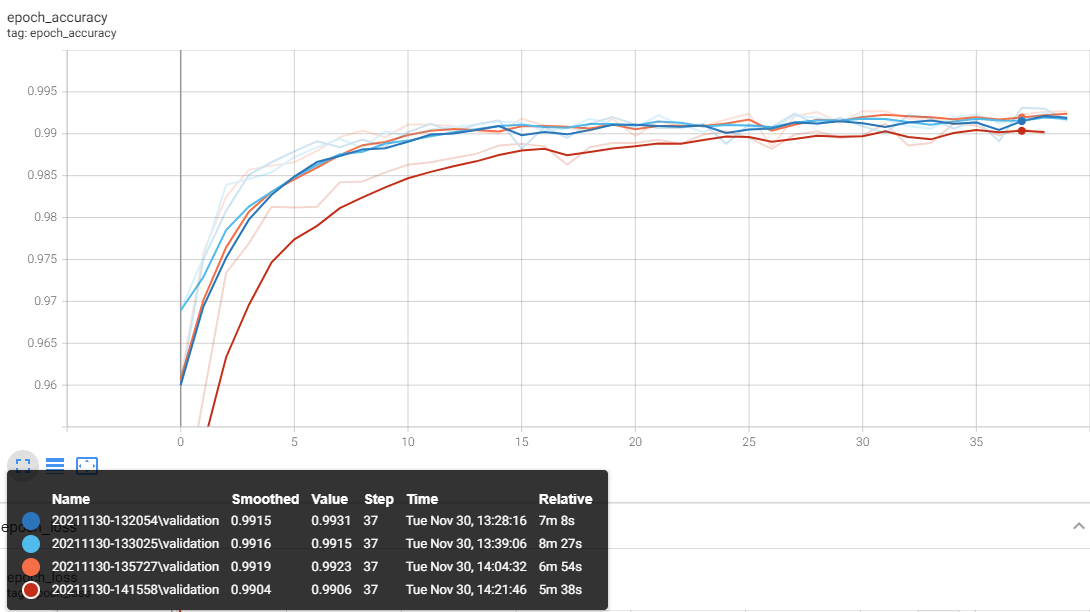

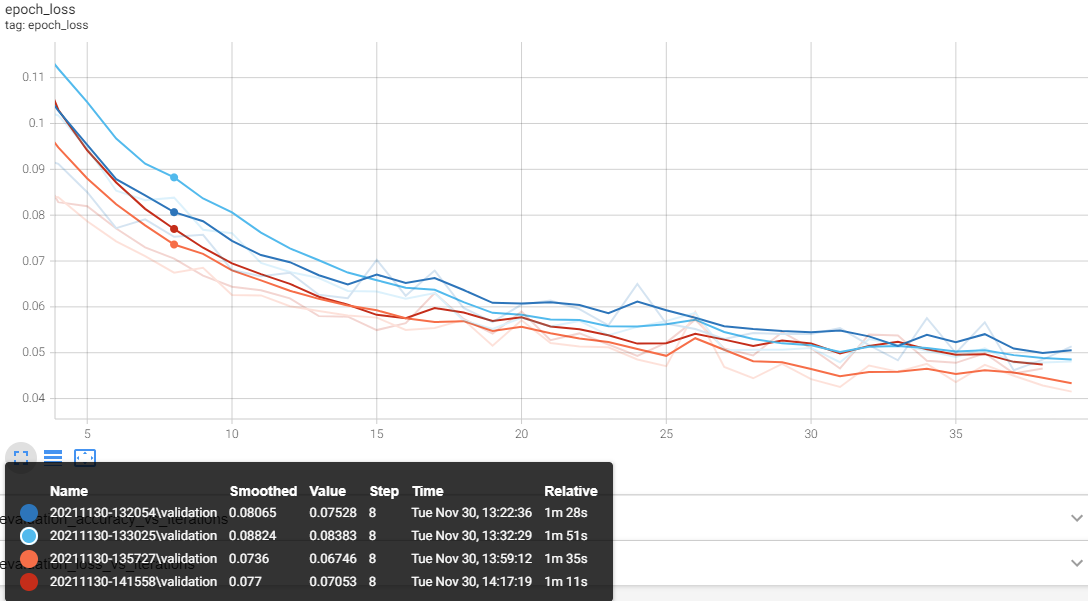

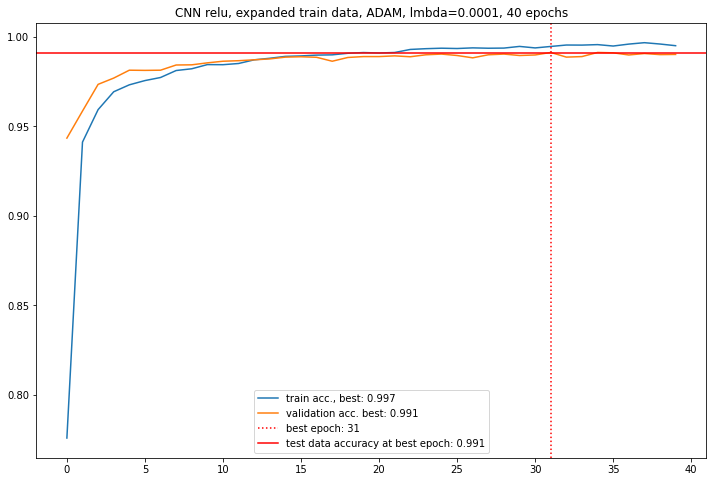

<h3>141558, 135727, 133025, 132054 : poolsize=(9,9), poolsize=(6,6), poolsize=(3,3), poolsize=(2,2).</h3>
<h3>Test Accuracy: (9,9), (6,6), (3,3), (2,2) : 99.10%, 99.40% 99.36%, 99.39%.</h3>
<h3>poolsize=(6,6)'s validation cost seems to be the lowest of 4.<h3/>


<h1>Against my intuition, smallest pooling size does not yield the best result (at least not for 40 epochs using sub-sampled training data).</h1>
<h4>For a more serious testing I should repeat these tests with multiple random seeds, but for now I will move on to tune other parameters<h4/>

<h1>Fixing layer1 pooling size to 6x6.</h1>
<h1>Now I will look at the effect of number of filters.<h1/>
<h3>filters = 32 -> 64:</h3>

checkpoint_filepath: C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\env\20211130-143341
lmbda= 0.0001

n_eph= 40

batch_size= 1000

learning_rate= 0.001

beta_1= 0.9

beta_2= 0.999

epsilon= 1e-07

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
__________________________________________________

Epoch 36/40
75/75 [==============================] - 26s 349ms/step - loss: 0.0216 - accuracy: 0.9984 - val_loss: 0.0415 - val_accuracy: 0.9937
Epoch 37/40
75/75 [==============================] - 27s 355ms/step - loss: 0.0216 - accuracy: 0.9984 - val_loss: 0.0403 - val_accuracy: 0.9932
Epoch 38/40
75/75 [==============================] - 26s 350ms/step - loss: 0.0214 - accuracy: 0.9982 - val_loss: 0.0473 - val_accuracy: 0.9918
Epoch 39/40
75/75 [==============================] - 26s 342ms/step - loss: 0.0220 - accuracy: 0.9981 - val_loss: 0.0453 - val_accuracy: 0.9920
Epoch 40/40
75/75 [==============================] - 26s 341ms/step - loss: 0.0208 - accuracy: 0.9982 - val_loss: 0.0486 - val_accuracy: 0.9909
total time: 965.639771938324

acc [0.8437866568565369, 0.969706654548645, 0.978826642036438, 0.9841200113296509, 0.9865333437919617, 0.9881066679954529, 0.9890666604042053, 0.9910266399383545, 0.9918933510780334, 0.9932933449745178, 0.9932533502578735, 0.9937199950218201, 0.99446

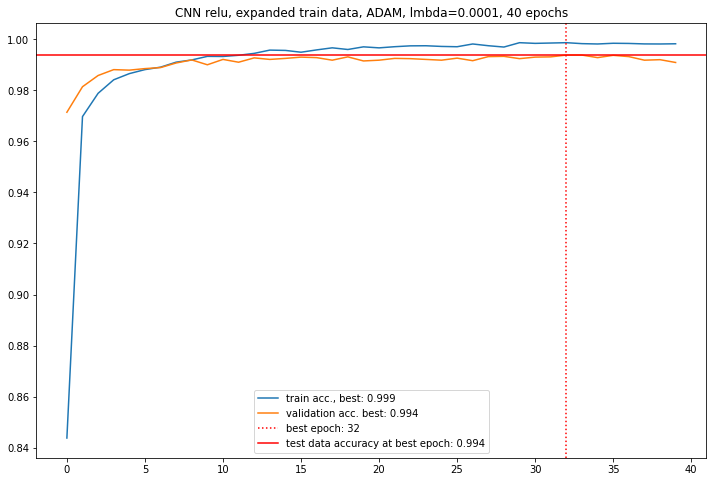

log_dir: logs/fit/20211130-143341


Reusing TensorBoard on port 6006 (pid 16568), started 3:53:34 ago. (Use '!kill 16568' to kill it.)

In [14]:

lmbda = 0.1 / 10 / 10 / 10
batch_size = 1000
n_eph = 40


n_filter=64 #experiment, 2x benchmark


tb_path = train_cnn_adam_tensorboardCB(
    lmbda,
    batch_size,
    n_eph,
#     train_x, train_y,
    sub_tx, sub_ty,
    val_x, val_y,
    test_x, test_y,
    addr,
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    input_shape=(28, 28, 1),
    hidden_activation=tf.nn.relu,
    out_activation=tf.nn.softmax,
    load_model_path=None,
    filter_1=n_filter,
    kernel_1=(5,5),
    pool___1=(6,6), # new benchmark
    stride_1=(2,2),
    filter_2=n_filter,
    kernel_2=(5,5),
    pool___2=(2,2),
    stride_2=(2,2),
    dense__1=1000
)

%reload_ext tensorboard
%tensorboard --logdir logs/fit --host localhost


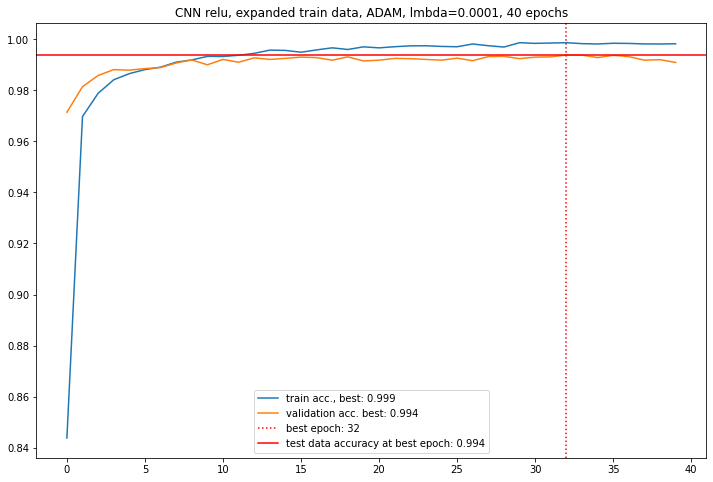

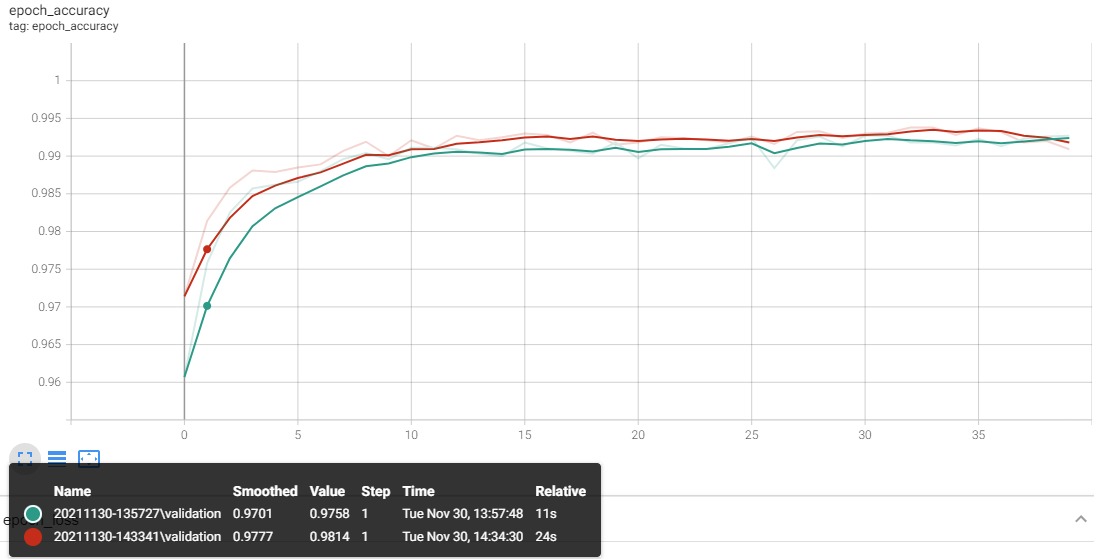

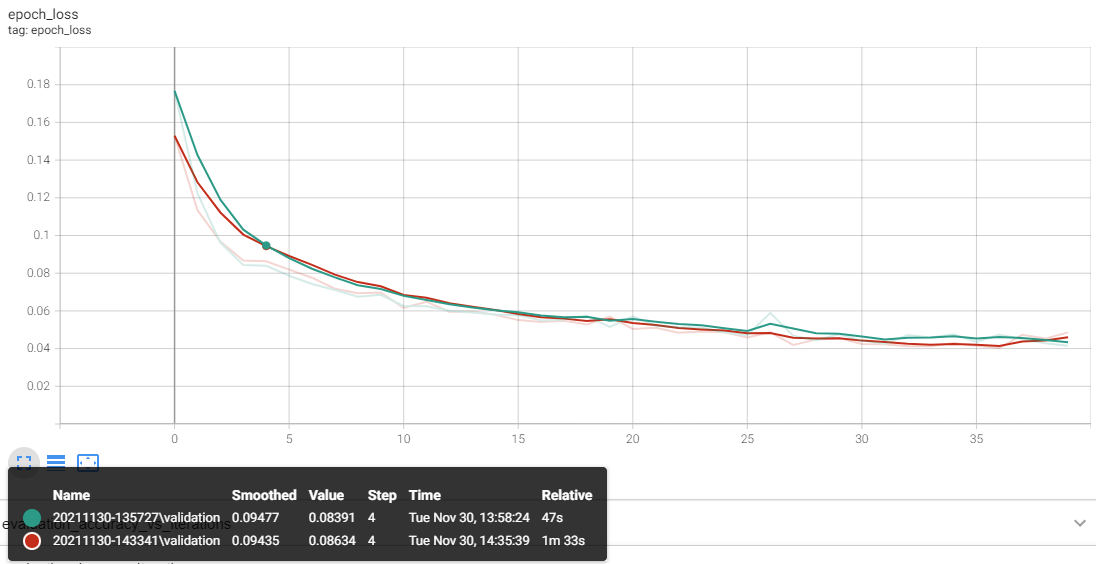

<h2>poolsize=(6,6)</h2>
<h3>135727, 143341 : filter=32, filter=64.</h3>
<h3>Test Accuracy: filter=32:99.40, filter=64: 99.39%.</h3>
<h3>The differences are too small.<h3/>

checkpoint_filepath: C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\env\20211130-174917
lmbda= 0.0001

n_eph= 40

batch_size= 1000

learning_rate= 0.001

beta_1= 0.9

beta_2= 0.999

epsilon= 1e-07

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 128)         409728    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
__________________________________________________

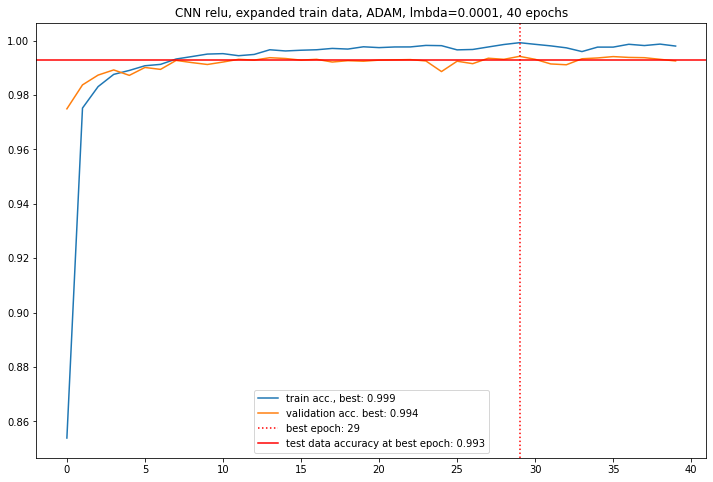

log_dir: logs/fit/20211130-174917


Reusing TensorBoard on port 6006 (pid 2064), started 0:59:48 ago. (Use '!kill 2064' to kill it.)

In [15]:

lmbda = 0.1 / 10 / 10 / 10
batch_size = 1000
n_eph = 40


n_filter=64*2 #experiment, 4x benchmark


tb_path = train_cnn_adam_tensorboardCB(
    lmbda,
    batch_size,
    n_eph,
#     train_x, train_y,
    sub_tx, sub_ty,
    val_x, val_y,
    test_x, test_y,
    addr,
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    input_shape=(28, 28, 1),
    hidden_activation=tf.nn.relu,
    out_activation=tf.nn.softmax,
    load_model_path=None,
    filter_1=n_filter,
    kernel_1=(5,5),
    pool___1=(6,6), # new benchmark
    stride_1=(2,2),
    filter_2=n_filter,
    kernel_2=(5,5),
    pool___2=(2,2),
    stride_2=(2,2),
    dense__1=1000
)

%reload_ext tensorboard
%tensorboard --logdir logs/fit --host localhost


<h1>increasing filter greatly increases number of parameters and the calculation time!</h1>

checkpoint_filepath: C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\env\20211130-183746
lmbda= 0.0001

n_eph= 561

batch_size= 1000

learning_rate= 0.001

beta_1= 0.9

beta_2= 0.999

epsilon= 1e-07

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 128)       3328      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 128)         409728    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_______________________________________________

75/75 [==============================] - 72s 954ms/step - loss: 0.0147 - accuracy: 0.9990 - val_loss: 0.0415 - val_accuracy: 0.9926
Epoch 96/561
75/75 [==============================] - 71s 950ms/step - loss: 0.0131 - accuracy: 0.9995 - val_loss: 0.0335 - val_accuracy: 0.9942
Epoch 97/561
75/75 [==============================] - 71s 945ms/step - loss: 0.0123 - accuracy: 0.9995 - val_loss: 0.0335 - val_accuracy: 0.9939
Epoch 98/561
75/75 [==============================] - 71s 947ms/step - loss: 0.0165 - accuracy: 0.9981 - val_loss: 0.0421 - val_accuracy: 0.9912
Epoch 99/561
75/75 [==============================] - 71s 949ms/step - loss: 0.0164 - accuracy: 0.9987 - val_loss: 0.0351 - val_accuracy: 0.9943
Epoch 100/561
75/75 [==============================] - 71s 949ms/step - loss: 0.0152 - accuracy: 0.9990 - val_loss: 0.0351 - val_accuracy: 0.9935
Epoch 101/561
75/75 [==============================] - 71s 941ms/step - loss: 0.0151 - accuracy: 0.9989 - val_loss: 0.0370 - val_accuracy: 0.9

75/75 [==============================] - 70s 935ms/step - loss: 0.0136 - accuracy: 0.9983 - val_loss: 0.0502 - val_accuracy: 0.9912
Epoch 207/561
75/75 [==============================] - 70s 939ms/step - loss: 0.0100 - accuracy: 0.9997 - val_loss: 0.0340 - val_accuracy: 0.9938
Epoch 208/561
75/75 [==============================] - 70s 933ms/step - loss: 0.0096 - accuracy: 0.9996 - val_loss: 0.0342 - val_accuracy: 0.9931
Epoch 209/561
75/75 [==============================] - 71s 940ms/step - loss: 0.0085 - accuracy: 0.9999 - val_loss: 0.0318 - val_accuracy: 0.9939
Epoch 210/561
75/75 [==============================] - 69s 921ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 0.9940
Epoch 211/561
75/75 [==============================] - 70s 934ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 0.9941
Epoch 212/561
75/75 [==============================] - 70s 937ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy:

75/75 [==============================] - 70s 934ms/step - loss: 0.0081 - accuracy: 0.9995 - val_loss: 0.0360 - val_accuracy: 0.9932
Epoch 319/561
75/75 [==============================] - 70s 935ms/step - loss: 0.0082 - accuracy: 0.9995 - val_loss: 0.0348 - val_accuracy: 0.9937
Epoch 320/561
75/75 [==============================] - 70s 934ms/step - loss: 0.0076 - accuracy: 0.9997 - val_loss: 0.0372 - val_accuracy: 0.9924
Epoch 321/561
75/75 [==============================] - 71s 943ms/step - loss: 0.0072 - accuracy: 0.9998 - val_loss: 0.0333 - val_accuracy: 0.9929
Epoch 322/561
75/75 [==============================] - 70s 938ms/step - loss: 0.0067 - accuracy: 0.9999 - val_loss: 0.0370 - val_accuracy: 0.9927
Epoch 323/561
75/75 [==============================] - 70s 928ms/step - loss: 0.0066 - accuracy: 0.9999 - val_loss: 0.0329 - val_accuracy: 0.9934
Epoch 324/561
75/75 [==============================] - 69s 923ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0338 - val_accuracy:

75/75 [==============================] - 68s 907ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0324 - val_accuracy: 0.9933
Epoch 431/561
75/75 [==============================] - 68s 912ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0296 - val_accuracy: 0.9928
Epoch 432/561
75/75 [==============================] - 68s 905ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0336 - val_accuracy: 0.9930
Epoch 433/561
75/75 [==============================] - 68s 909ms/step - loss: 0.0085 - accuracy: 0.9987 - val_loss: 0.0368 - val_accuracy: 0.9908
Epoch 434/561
75/75 [==============================] - 69s 924ms/step - loss: 0.0134 - accuracy: 0.9973 - val_loss: 0.0383 - val_accuracy: 0.9921
Epoch 435/561
75/75 [==============================] - 68s 905ms/step - loss: 0.0083 - accuracy: 0.9994 - val_loss: 0.0359 - val_accuracy: 0.9932
Epoch 436/561
75/75 [==============================] - 68s 909ms/step - loss: 0.0078 - accuracy: 0.9996 - val_loss: 0.0422 - val_accuracy:

75/75 [==============================] - 68s 909ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0314 - val_accuracy: 0.9934
Epoch 543/561
75/75 [==============================] - 69s 925ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 0.9939
Epoch 544/561
75/75 [==============================] - 68s 907ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0304 - val_accuracy: 0.9937
Epoch 545/561
75/75 [==============================] - 68s 907ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0308 - val_accuracy: 0.9931
Epoch 546/561
75/75 [==============================] - 68s 908ms/step - loss: 0.0047 - accuracy: 0.9999 - val_loss: 0.0328 - val_accuracy: 0.9923
Epoch 547/561
75/75 [==============================] - 68s 912ms/step - loss: 0.0099 - accuracy: 0.9984 - val_loss: 0.0385 - val_accuracy: 0.9912
Epoch 548/561
75/75 [==============================] - 68s 909ms/step - loss: 0.0103 - accuracy: 0.9981 - val_loss: 0.0450 - val_accuracy:

val_loss [0.16145187616348267, 0.12119538336992264, 0.10321284085512161, 0.0950256884098053, 0.09817338734865189, 0.08329197019338608, 0.08003480732440948, 0.07341276109218597, 0.07034958153963089, 0.07171712070703506, 0.06417135894298553, 0.06132238730788231, 0.060926660895347595, 0.05812711641192436, 0.055871766060590744, 0.05440632998943329, 0.05117840692400932, 0.055597953498363495, 0.05051101744174957, 0.05154447630047798, 0.050517406314611435, 0.04714572802186012, 0.049249254167079926, 0.04560806229710579, 0.05645657330751419, 0.04826955869793892, 0.05102047324180603, 0.04283563420176506, 0.04351457953453064, 0.041301485151052475, 0.042593713849782944, 0.04740551486611366, 0.04711601883172989, 0.04158550873398781, 0.041169244796037674, 0.03792702779173851, 0.039405468851327896, 0.038006704300642014, 0.039865799248218536, 0.04583239182829857, 0.03775395080447197, 0.040564924478530884, 0.03882891684770584, 0.040770817548036575, 0.0422997921705246, 0.04833446815609932, 0.03527857735

1/1 [==============================] - 3s 3s/step - loss: 0.0318 - accuracy: 0.9940


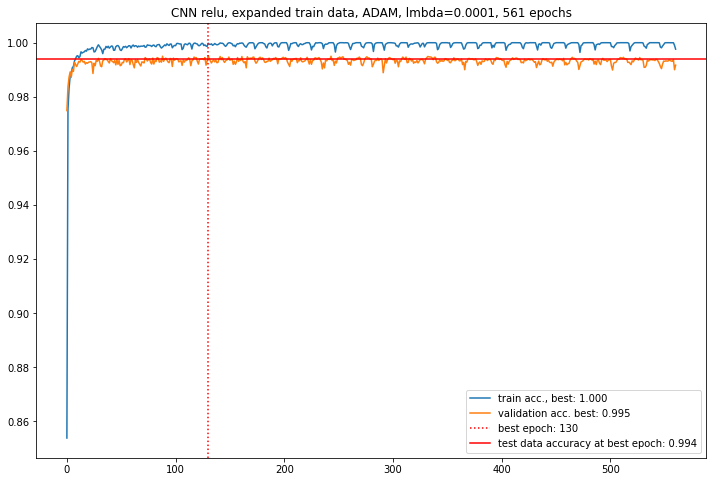

log_dir: logs/fit/20211130-183746


Reusing TensorBoard on port 6006 (pid 2064), started 11:53:41 ago. (Use '!kill 2064' to kill it.)

In [16]:

lmbda = 0.1 / 10 / 10 / 10
batch_size = 1000
n_eph = 561


n_filter=64*2 #experiment, 4x benchmark


tb_path = train_cnn_adam_tensorboardCB(
    lmbda,
    batch_size,
    n_eph,
#     train_x, train_y,
    sub_tx, sub_ty,
    val_x, val_y,
    test_x, test_y,
    addr,
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    input_shape=(28, 28, 1),
    hidden_activation=tf.nn.relu,
    out_activation=tf.nn.softmax,
    load_model_path=None,
    filter_1=n_filter,
    kernel_1=(5,5),
    pool___1=(6,6), # new benchmark
    stride_1=(2,2),
    filter_2=n_filter,
    kernel_2=(5,5),
    pool___2=(2,2),
    stride_2=(2,2),
    dense__1=1000
)

%reload_ext tensorboard
%tensorboard --logdir logs/fit --host localhost


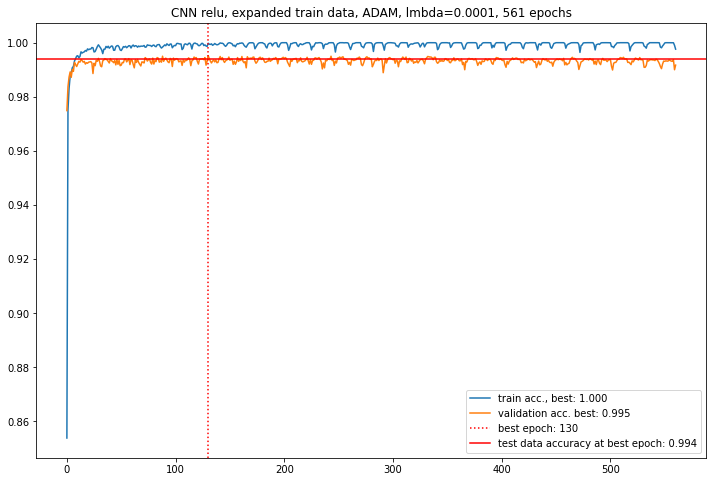

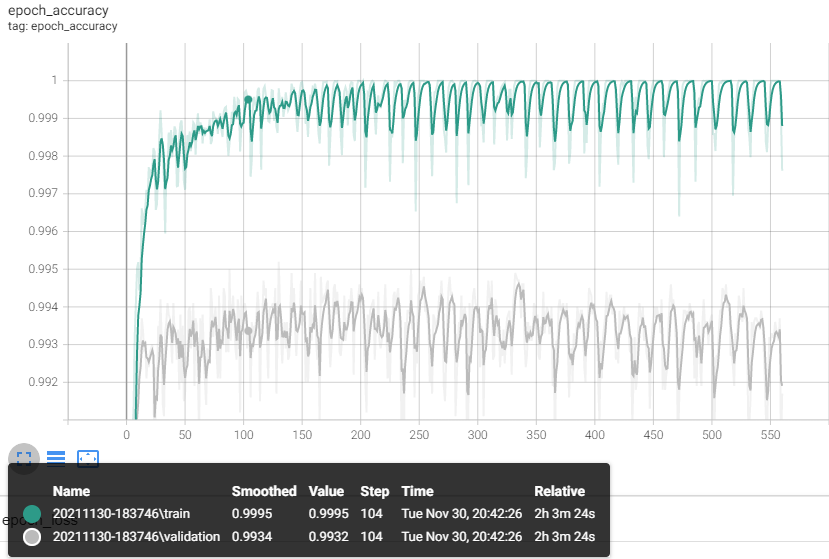

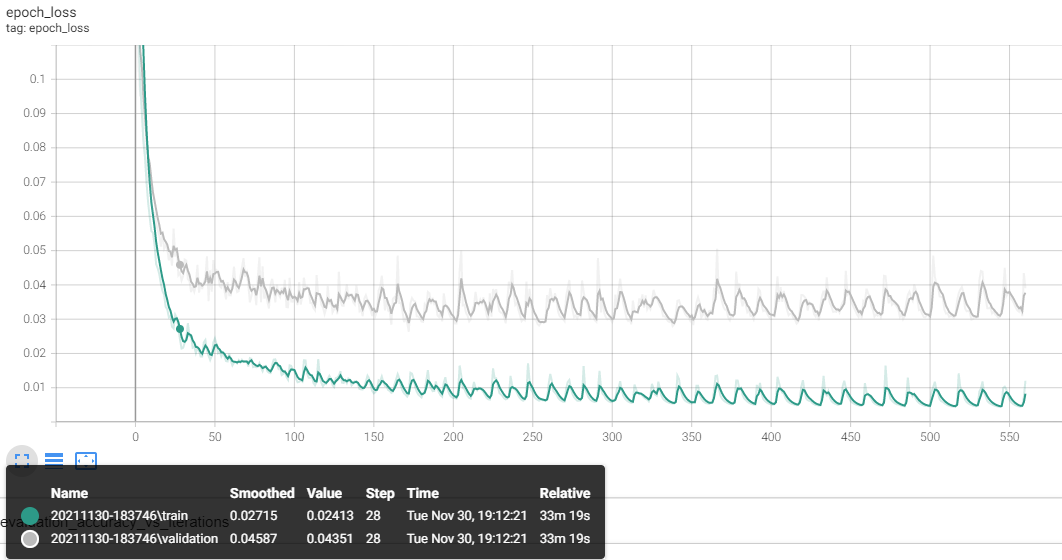

<h1>looks like the learning rate is way too high for such long training.</h1>
<h1>learning had ended aronud epoch no 200.</h1>
<h2>looks like 99.4% is the limit for the current setup.<h2/>

<h1>Current best ADAM model:</h1>

In [43]:

load_model_path = r'C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\env\20211130-183746'

model = tf.keras.models.load_model(load_model_path) 

error_ind = []
for i in range(len(test_x)):
    tx = np.expand_dims(test_x[i], axis=0)
    ret = model(tx)
    answer = np.argmax(test_y[i])
    prediction = np.argmax(ret)
    if not answer == prediction:
        error_ind.append(i)
    
print('number of errors:', len(error_ind), '/', len(test_x))


number of errors: 60 / 10000


no. 0 id: 340


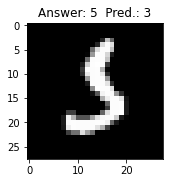

no. 1 id: 659


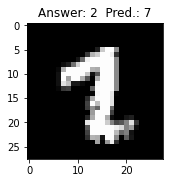

no. 2 id: 674


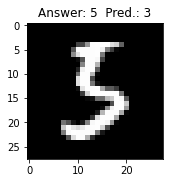

no. 3 id: 726


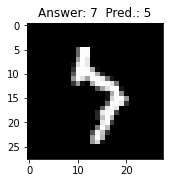

no. 4 id: 846


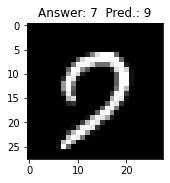

no. 5 id: 882


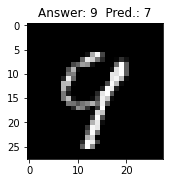

no. 6 id: 947


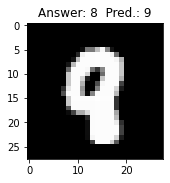

no. 7 id: 1014


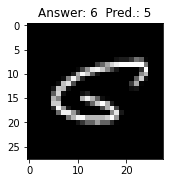

no. 8 id: 1039


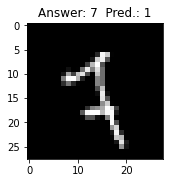

no. 9 id: 1112


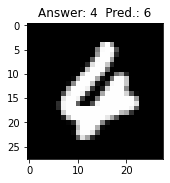

no. 10 id: 1138


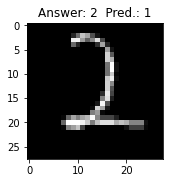

no. 11 id: 1232


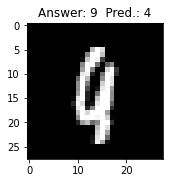

no. 12 id: 1242


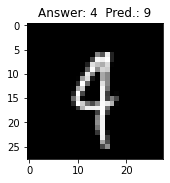

no. 13 id: 1299


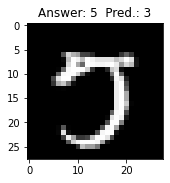

no. 14 id: 1621


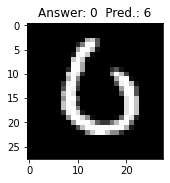

no. 15 id: 1737


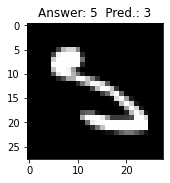

no. 16 id: 1880


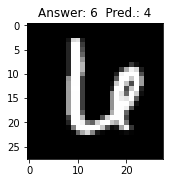

no. 17 id: 1901


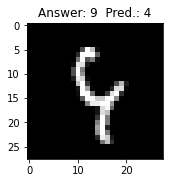

no. 18 id: 2035


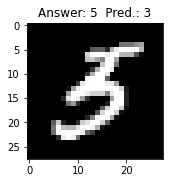

no. 19 id: 2053


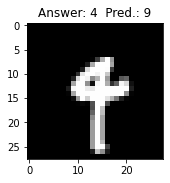

no. 20 id: 2118


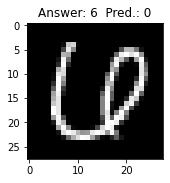

no. 21 id: 2130


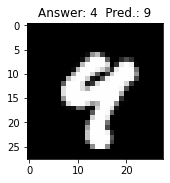

no. 22 id: 2135


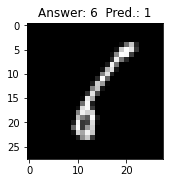

no. 23 id: 2293


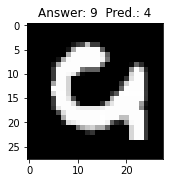

no. 24 id: 2447


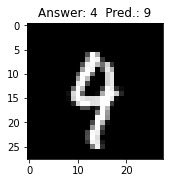

no. 25 id: 2462


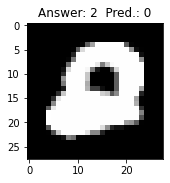

no. 26 id: 2597


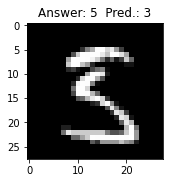

no. 27 id: 2654


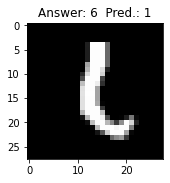

no. 28 id: 2896


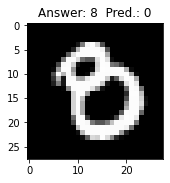

no. 29 id: 2927


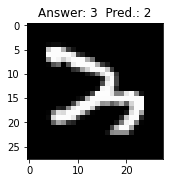

no. 30 id: 2970


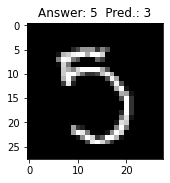

no. 31 id: 3073


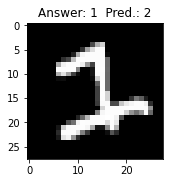

no. 32 id: 3225


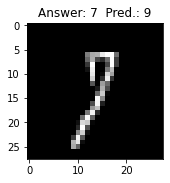

no. 33 id: 3558


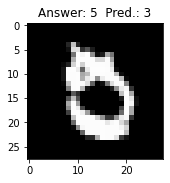

no. 34 id: 3762


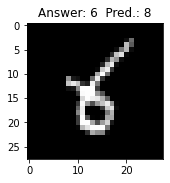

no. 35 id: 4078


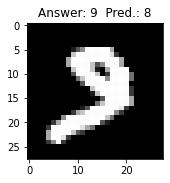

no. 36 id: 4176


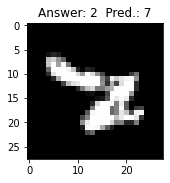

no. 37 id: 4201


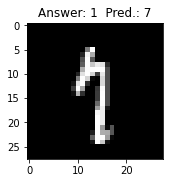

no. 38 id: 4284


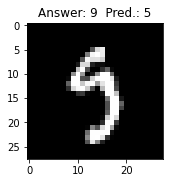

no. 39 id: 4443


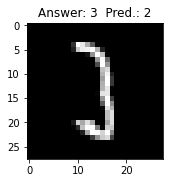

no. 40 id: 4699


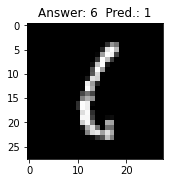

no. 41 id: 4740


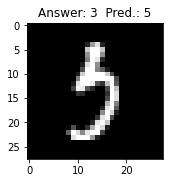

no. 42 id: 4761


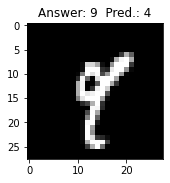

no. 43 id: 4814


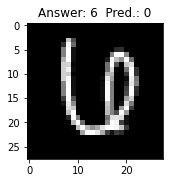

no. 44 id: 5654


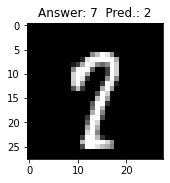

no. 45 id: 5655


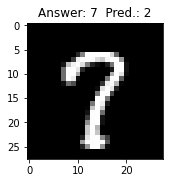

no. 46 id: 5937


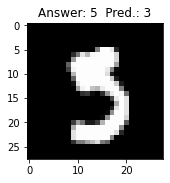

no. 47 id: 5997


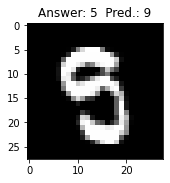

no. 48 id: 6576


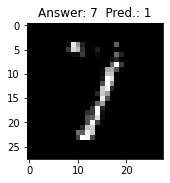

no. 49 id: 6597


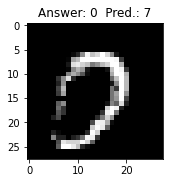

no. 50 id: 6625


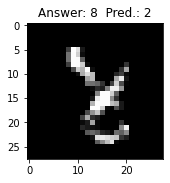

no. 51 id: 8095


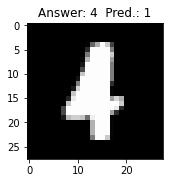

no. 52 id: 8316


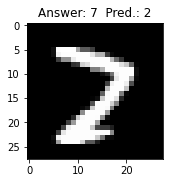

no. 53 id: 8408


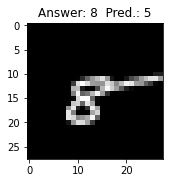

no. 54 id: 8527


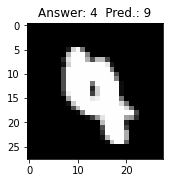

no. 55 id: 9015


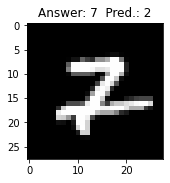

no. 56 id: 9642


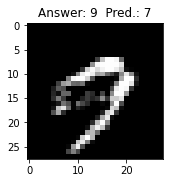

no. 57 id: 9664


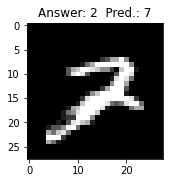

no. 58 id: 9692


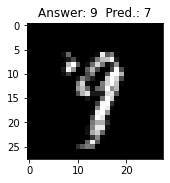

no. 59 id: 9729


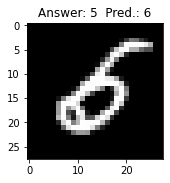

In [15]:
plt.rcParams["figure.figsize"] = [2.5, 2.5]

count = 0
for ind in error_ind:
    print('no.', count, 'id:', ind); count = count + 1
    test_img = test_x[ind]
    tx = np.expand_dims(test_x[ind], axis=0)
    p = np.argmax(model(tx))
    y = np.argmax(test_y[ind])
    plt.title('Answer: {}  Pred.: {}'.format(y, p))
    plt.imshow(test_img, cmap=plt.get_cmap('gray'))
    plt.show()

plt.rcParams["figure.figsize"] = [12,8]

<h1>Here I am going to remove ambiguous pictures from the test data to  inference the true accuracy.</h1>
<h2>('ambiguous' means me as a human cannot easily give 1 single answer for a given picture, or my answer is wrong)</h2>

In [11]:
import copy

refined_test_x = copy.deepcopy(test_x)
refined_test_y = copy.deepcopy(test_y)

amb_list = [340, 726, 846, 2130, 2462, 2654, 3558, 4284, 4740, 5654, 8316, 9664, 9729]

refined_test_x = np.delete(refined_test_x, amb_list, axis=0)
refined_test_y = np.delete(refined_test_y, amb_list, axis=0)

print(len(refined_test_x))
print(len(refined_test_y))

9987
9987


In [20]:

load_model_path = r'C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\env\20211130-183746'

model = tf.keras.models.load_model(load_model_path) 

refined_error_ind = []
for i in range(len(refined_test_x)):
    tx = np.expand_dims(refined_test_x[i], axis=0)
    ret = model(tx)
    answer = np.argmax(refined_test_y[i])
    prediction = np.argmax(ret)
    if not answer == prediction:
        refined_error_ind.append(i)
    
print('number of errors after removing invalid data:', len(refined_error_ind), '/', len(refined_test_x))


number of errors after removing invalid data: 47 / 9987


no. 0 id: 658


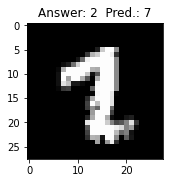

no. 1 id: 673


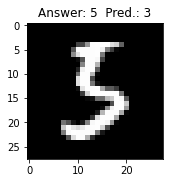

no. 2 id: 879


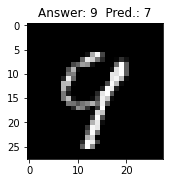

no. 3 id: 944


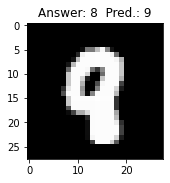

no. 4 id: 1011


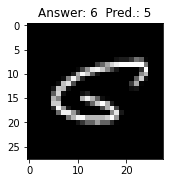

no. 5 id: 1036


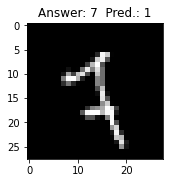

no. 6 id: 1109


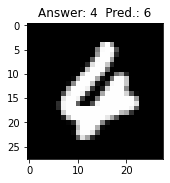

no. 7 id: 1135


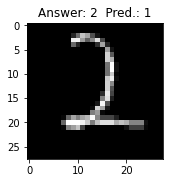

no. 8 id: 1229


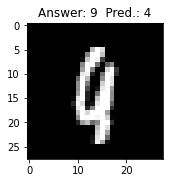

no. 9 id: 1239


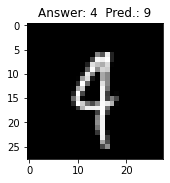

no. 10 id: 1296


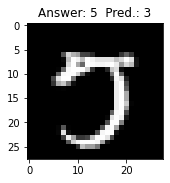

no. 11 id: 1618


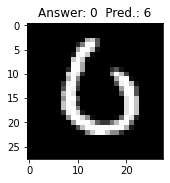

no. 12 id: 1734


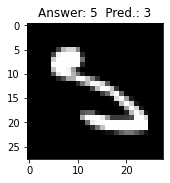

no. 13 id: 1877


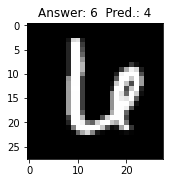

no. 14 id: 1898


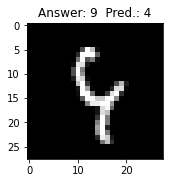

no. 15 id: 2032


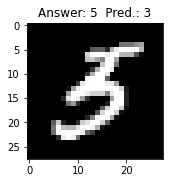

no. 16 id: 2050


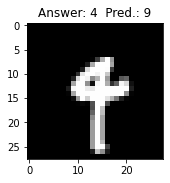

no. 17 id: 2115


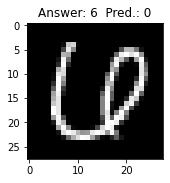

no. 18 id: 2131


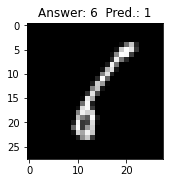

no. 19 id: 2289


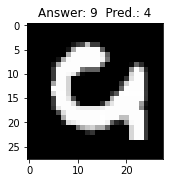

no. 20 id: 2443


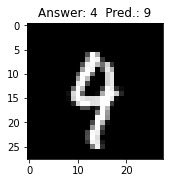

no. 21 id: 2592


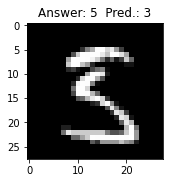

no. 22 id: 2890


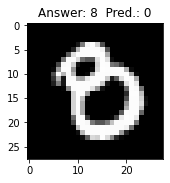

no. 23 id: 2921


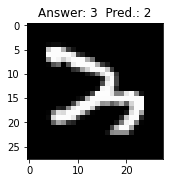

no. 24 id: 2964


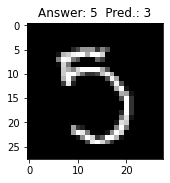

no. 25 id: 3067


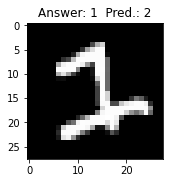

no. 26 id: 3219


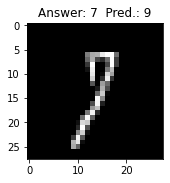

no. 27 id: 3755


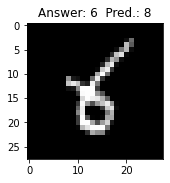

no. 28 id: 4071


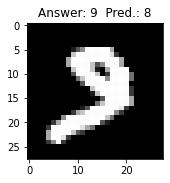

no. 29 id: 4169


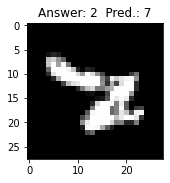

no. 30 id: 4194


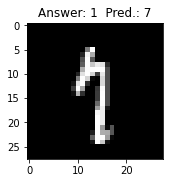

no. 31 id: 4435


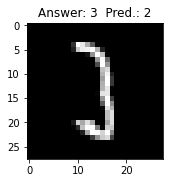

no. 32 id: 4691


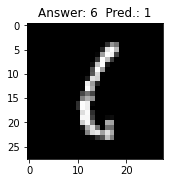

no. 33 id: 4752


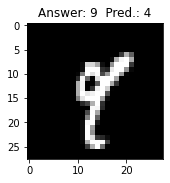

no. 34 id: 4805


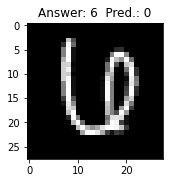

no. 35 id: 5645


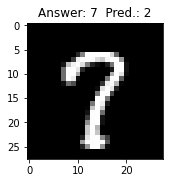

no. 36 id: 5927


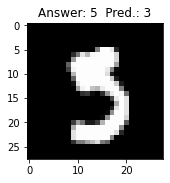

no. 37 id: 5987


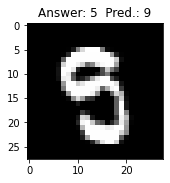

no. 38 id: 6566


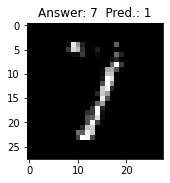

no. 39 id: 6587


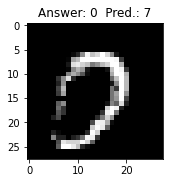

no. 40 id: 6615


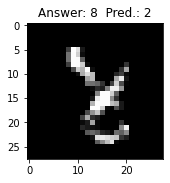

no. 41 id: 8085


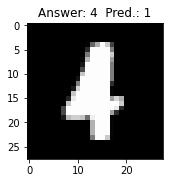

no. 42 id: 8397


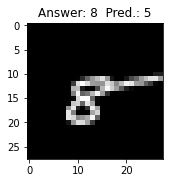

no. 43 id: 8516


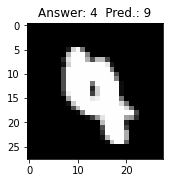

no. 44 id: 9004


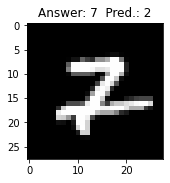

no. 45 id: 9631


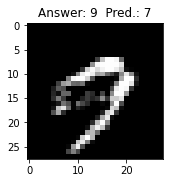

no. 46 id: 9680


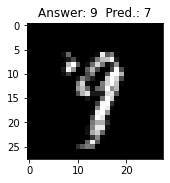

In [21]:
plt.rcParams["figure.figsize"] = [2.5, 2.5]

count = 0
for ind in refined_error_ind:
    print('no.', count, 'id:', ind); count = count + 1
    test_img = refined_test_x[ind]
    tx = np.expand_dims(refined_test_x[ind], axis=0)
    p = np.argmax(model(tx))
    y = np.argmax(refined_test_y[ind])
    plt.title('Answer: {}  Pred.: {}'.format(y, p))
    plt.imshow(test_img, cmap=plt.get_cmap('gray'))
    plt.show()

plt.rcParams["figure.figsize"] = [12,8]

<h1>(Hand picked) accuracy is about 99.53%.</h1>
<h2>From the pictures, it is clear that the current model have the tendency to overlook small, local features in a digit.</h2>
<h2>This is expected since we are using large (6x6) pooling size.<h2/>


<h1>Current best SGD model:</h1>
<h3>In previous experiments I didn't save the model correctly so I have to retrain it...</h3>

lmbda= 0.0001

eta= 0.03

n_eph= 40

batch_size= 10

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 40)          20040     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 40)          0         
_________________________________________________________________
flatten (Flatten)            (None, 640)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               64100     
_________________________________________________________________
den

75000/75000 [==============================] - 335s 4ms/step - loss: 0.0140 - accuracy: 0.9990 - val_loss: 0.0346 - val_accuracy: 0.9954
INFO:tensorflow:Assets written to: C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\env\20211201-103500\assets
Epoch 40/40
75000/75000 [==============================] - 335s 4ms/step - loss: 0.0146 - accuracy: 0.9987 - val_loss: 0.0332 - val_accuracy: 0.9954cy: 0.
total time: 13524.875345230103
1/1 [==============================] - 0s 493ms/step - loss: 0.0290 - accuracy: 0.9947


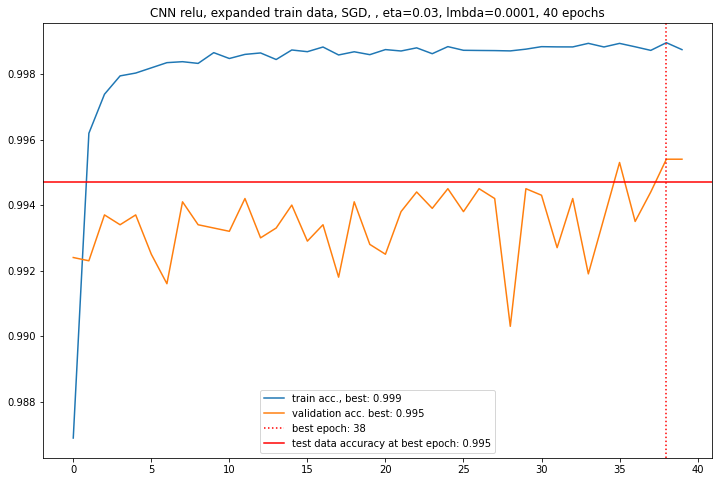

acc [0.9868906736373901, 0.9961906671524048, 0.997382640838623, 0.9979426860809326, 0.998029351234436, 0.9981880187988281, 0.9983466863632202, 0.9983760118484497, 0.9983239769935608, 0.9986519813537598, 0.9984733462333679, 0.9985986948013306, 0.9986426830291748, 0.9984426498413086, 0.9987333416938782, 0.9986813068389893, 0.9988240003585815, 0.9985813498497009, 0.9986786842346191, 0.9985906481742859, 0.998745322227478, 0.9987026453018188, 0.998798668384552, 0.9986199736595154, 0.9988359808921814, 0.9987239837646484, 0.9987186789512634, 0.9987146854400635, 0.9987053275108337, 0.9987586736679077, 0.9988346695899963, 0.9988279938697815, 0.9988266825675964, 0.9989359974861145, 0.9988253116607666, 0.9989346861839294, 0.9988306760787964, 0.9987213611602783, 0.998956024646759, 0.998744010925293]
loss [0.06514786183834076, 0.0314248763024807, 0.024718955159187317, 0.021361222490668297, 0.02001664601266384, 0.01891523413360119, 0.01812504231929779, 0.01775422878563404, 0.017721137031912804, 0.01

In [9]:
################################################################
#   relu CNN network as described in chapter 6
################################################################
tf.random.set_seed(42)
# tf.random.set_seed(24)
################################################################


#################################
#    h-param base line
#################################
lmbda = 0.1 / 10 / 10 / 10
eta = 0.03
batch_size = 10

n_eph = 40




################################################################
print('lmbda= {}\n'.format(lmbda))
print('eta= {}\n'.format(eta))
print('n_eph= {}\n'.format(n_eph))
print('batch_size= {}\n'.format(batch_size))
################################################################


################################################################
# construct netwoek model
input_shape = (28, 28, 1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D( # no padding
        20,
        (5,5),
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda),
        input_shape=input_shape))

model.add(tf.keras.layers.MaxPool2D(strides=(2,2)))

model.add(tf.keras.layers.Conv2D( # no padding
        40,
        (5,5),
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda)))

model.add(tf.keras.layers.MaxPool2D(strides=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
        100,
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda)))

model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
################################################################

################################################################
# compile model
model.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=eta,
        momentum=0.0,
        nesterov=False,
        name="SGD"),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

################################################################

model.summary()

################################################################
#  set time stamp:
stamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

################################################################
#  set checkpointCB
checkpoint_filepath = addr + '\{}'.format(stamp)
print('checkpoint_filepath:',checkpoint_filepath)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

################################################################
#  set tensorboardCB
log_dir = "logs/fit/" + stamp
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
################################################################

################################################################
#    train model
ts = time.time()
history = model.fit(
    train_x, train_y, 
    epochs=n_eph,
    batch_size=batch_size,
    validation_data=(val_x, val_y),
    callbacks=[model_checkpoint_callback],
    shuffle=True
)
te = time.time()

print('total time:', te - ts)


acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
################################################################


################################################################
#    load the weights for the best epoch (best val accuracy)
model.load_weights(checkpoint_filepath)

################################################################

################################################################
#    evaluate test data at the best epoch
[test_data_loss, test_data_accuracy] = model.evaluate(
    test_x, test_y,
    batch_size=len(test_x)
)
################################################################


plt.plot(acc, label='train acc., best: {:.3f}'.format(max(acc)))
plt.plot(val_acc, label='validation acc. best: {:.3f}'.format(max(val_acc)))
plt.title('CNN relu, expanded train data, SGD, , eta={}, lmbda={}, {} epochs'.format(eta, lmbda, n_eph))
plt.axvline(x=np.argmax(val_acc), c='r', ls=':', label='best epoch: {}'.format(np.argmax(val_acc)))
plt.axhline(y=test_data_accuracy, c='r', label='test data accuracy at best epoch: {:.3f}'.format(test_data_accuracy))
plt.legend()
plt.show()

Beep(1000, 100)


print('acc', acc)
print('loss', loss)
print('val_acc', val_acc)
print('val_loss', val_loss)

In [26]:

load_model_path = r'C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\env\20211201-103500'

model = tf.keras.models.load_model(load_model_path) 

refined_error_ind_sgd = []
for i in range(len(refined_test_x)):
    tx = np.expand_dims(refined_test_x[i], axis=0)
    ret = model(tx)
    answer = np.argmax(refined_test_y[i])
    prediction = np.argmax(ret)
    if not answer == prediction:
        refined_error_ind_sgd.append(i)
    
print('number of errors after removing invalid data:', len(refined_error_ind_sgd), '/', len(refined_test_x))


number of errors after removing invalid data: 47 / 9987


no. 0 id: 358


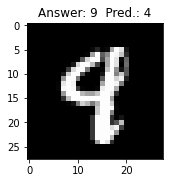

no. 1 id: 444


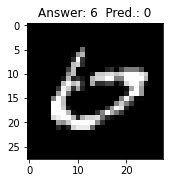

no. 2 id: 581


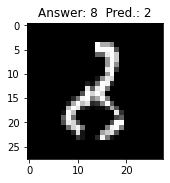

no. 3 id: 582


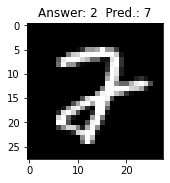

no. 4 id: 624


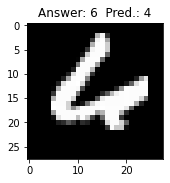

no. 5 id: 658


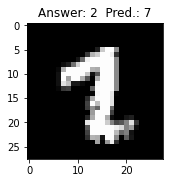

no. 6 id: 673


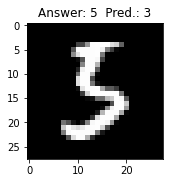

no. 7 id: 880


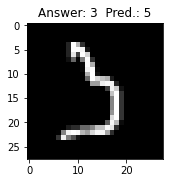

no. 8 id: 944


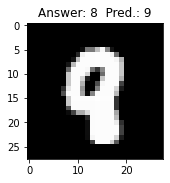

no. 9 id: 1011


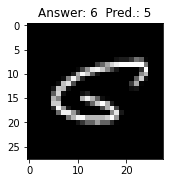

no. 10 id: 1179


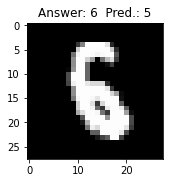

no. 11 id: 1229


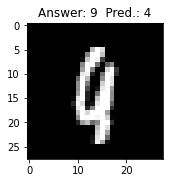

no. 12 id: 1244


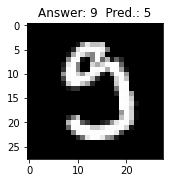

no. 13 id: 1400


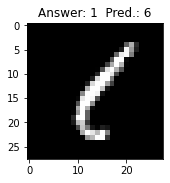

no. 14 id: 1678


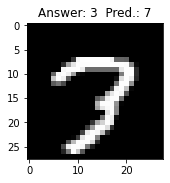

no. 15 id: 1875


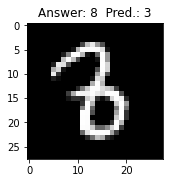

no. 16 id: 1898


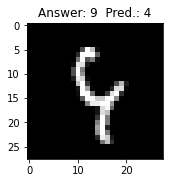

no. 17 id: 2032


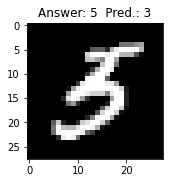

no. 18 id: 2115


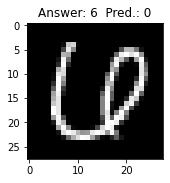

no. 19 id: 2178


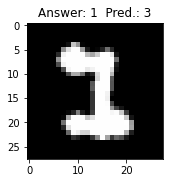

no. 20 id: 2289


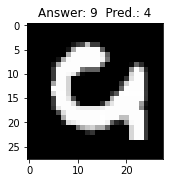

no. 21 id: 2592


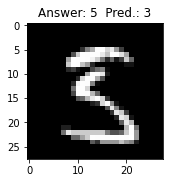

no. 22 id: 2933


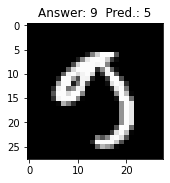

no. 23 id: 2947


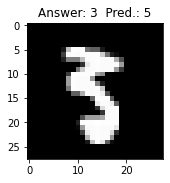

no. 24 id: 3219


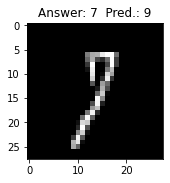

no. 25 id: 3416


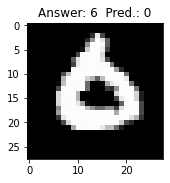

no. 26 id: 3514


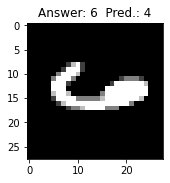

no. 27 id: 3720


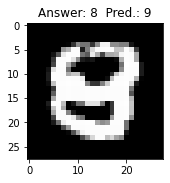

no. 28 id: 3978


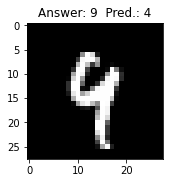

no. 29 id: 4071


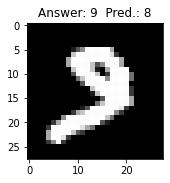

no. 30 id: 4169


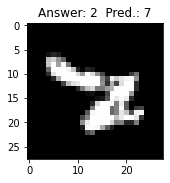

no. 31 id: 4417


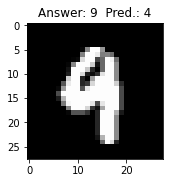

no. 32 id: 4479


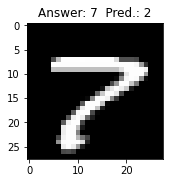

no. 33 id: 4496


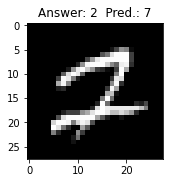

no. 34 id: 4805


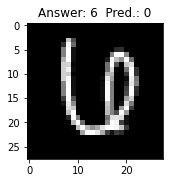

no. 35 id: 4814


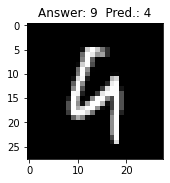

no. 36 id: 5190


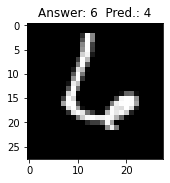

no. 37 id: 5927


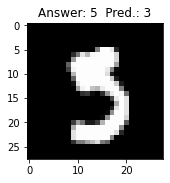

no. 38 id: 6566


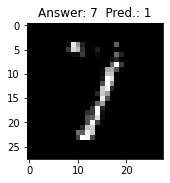

no. 39 id: 6587


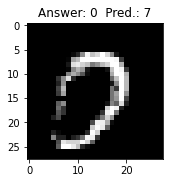

no. 40 id: 8397


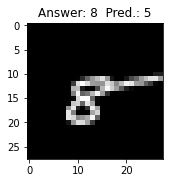

no. 41 id: 9494


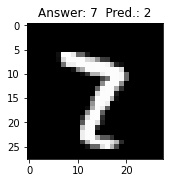

no. 42 id: 9519


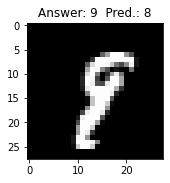

no. 43 id: 9631


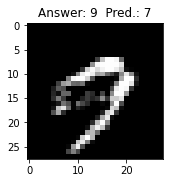

no. 44 id: 9657


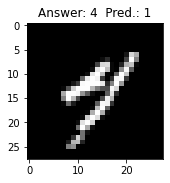

no. 45 id: 9667


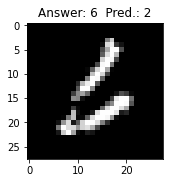

no. 46 id: 9779


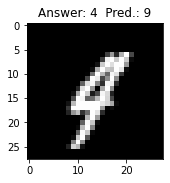

In [27]:
plt.rcParams["figure.figsize"] = [2.5, 2.5]

count = 0
for ind in refined_error_ind_sgd:
    print('no.', count, 'id:', ind); count = count + 1
    test_img = refined_test_x[ind]
    tx = np.expand_dims(refined_test_x[ind], axis=0)
    p = np.argmax(model(tx))
    y = np.argmax(refined_test_y[ind])
    plt.title('Answer: {}  Pred.: {}'.format(y, p))
    plt.imshow(test_img, cmap=plt.get_cmap('gray'))
    plt.show()

plt.rcParams["figure.figsize"] = [12,8]

<h1>With great surprise, SGD model's total error after removing ambiguous images is the same as ADAM model.</h1>
<h2>The places where they make mistakes are different, though.</h2>

In [34]:
union = list(set(refined_error_ind).union(set(refined_error_ind_sgd)))

In [36]:
len(union)

75

In [37]:
only_SGD = []
only_ADAM = []
both_SGD_ADAM = []

for ind in union:
    if ind in refined_error_ind and ind in refined_error_ind_sgd:
        both_SGD_ADAM.append(ind)
    elif ind in refined_error_ind:
        only_SGD.append(ind)
    else:
        only_ADAM.append(ind)


In [38]:
len(only_SGD)

28

In [39]:
len(only_ADAM)

28

In [40]:
len(both_SGD_ADAM)

19

<h1>Mistakes only SGD make</h1>

no. 0 id: 2050


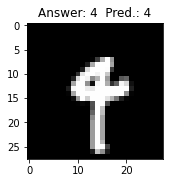

no. 1 id: 1036


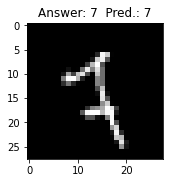

no. 2 id: 5645


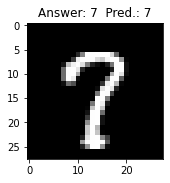

no. 3 id: 1296


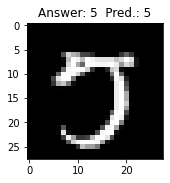

no. 4 id: 9004


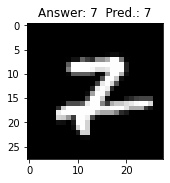

no. 5 id: 8516


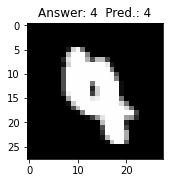

no. 6 id: 2890


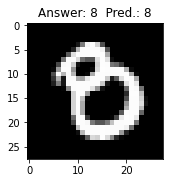

no. 7 id: 1618


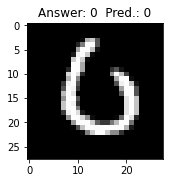

no. 8 id: 2131


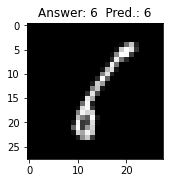

no. 9 id: 4435


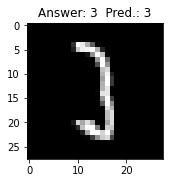

no. 10 id: 1109


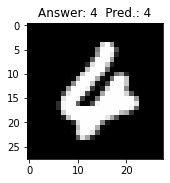

no. 11 id: 1877


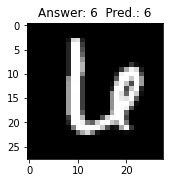

no. 12 id: 4691


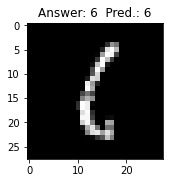

no. 13 id: 4194


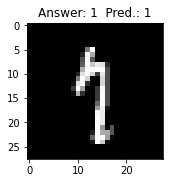

no. 14 id: 5987


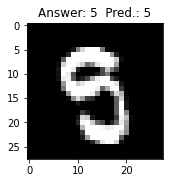

no. 15 id: 2921


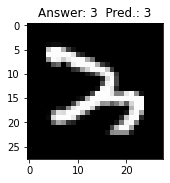

no. 16 id: 879


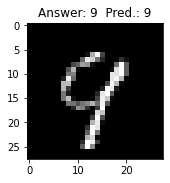

no. 17 id: 1135


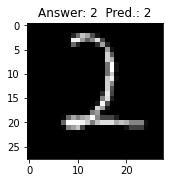

no. 18 id: 2443


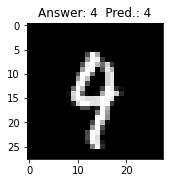

no. 19 id: 4752


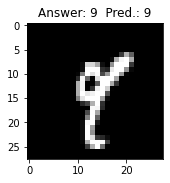

no. 20 id: 2964


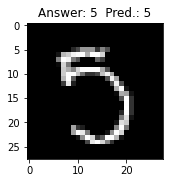

no. 21 id: 8085


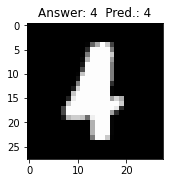

no. 22 id: 3755


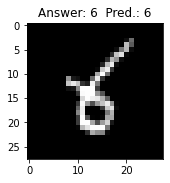

no. 23 id: 1734


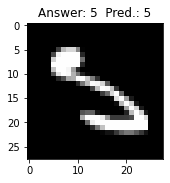

no. 24 id: 9680


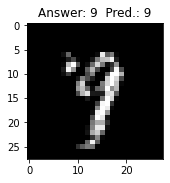

no. 25 id: 1239


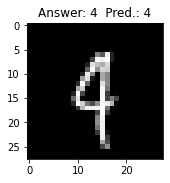

no. 26 id: 6615


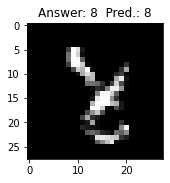

no. 27 id: 3067


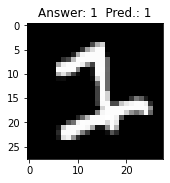

In [41]:
plt.rcParams["figure.figsize"] = [2.5, 2.5]

count = 0
for ind in only_SGD:
    print('no.', count, 'id:', ind); count = count + 1
    test_img = refined_test_x[ind]
    tx = np.expand_dims(refined_test_x[ind], axis=0)
    p = np.argmax(model(tx))
    y = np.argmax(refined_test_y[ind])
    plt.title('Answer: {}  Pred.: {}'.format(y, p))
    plt.imshow(test_img, cmap=plt.get_cmap('gray'))
    plt.show()

plt.rcParams["figure.figsize"] = [12,8]

<h1>Mistakes only ADAM make:</h1>

no. 0 id: 9494


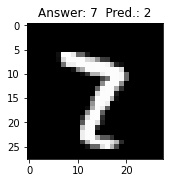

no. 1 id: 9519


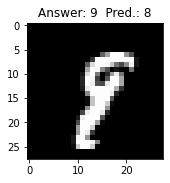

no. 2 id: 9779


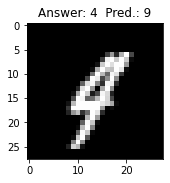

no. 3 id: 4417


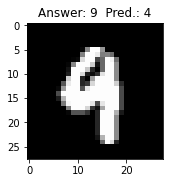

no. 4 id: 581


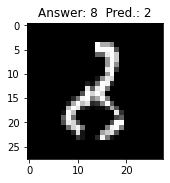

no. 5 id: 582


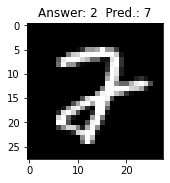

no. 6 id: 5190


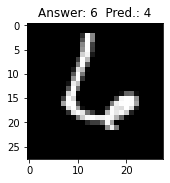

no. 7 id: 1875


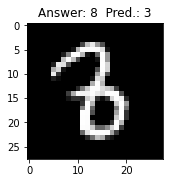

no. 8 id: 3416


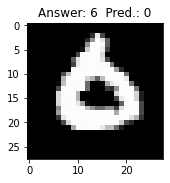

no. 9 id: 358


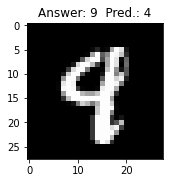

no. 10 id: 624


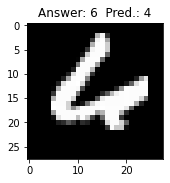

no. 11 id: 880


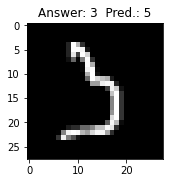

no. 12 id: 2933


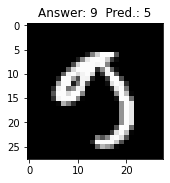

no. 13 id: 1400


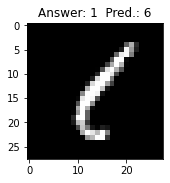

no. 14 id: 4479


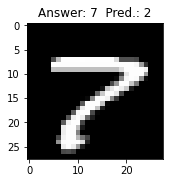

no. 15 id: 2178


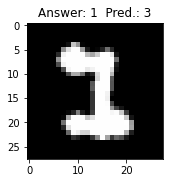

no. 16 id: 2947


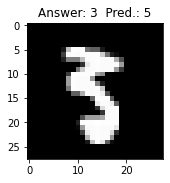

no. 17 id: 3720


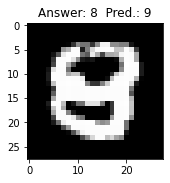

no. 18 id: 3978


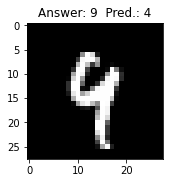

no. 19 id: 1678


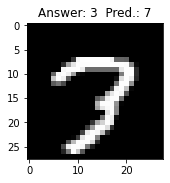

no. 20 id: 4496


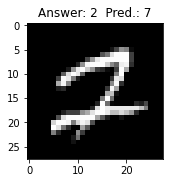

no. 21 id: 1179


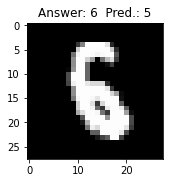

no. 22 id: 9657


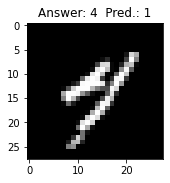

no. 23 id: 3514


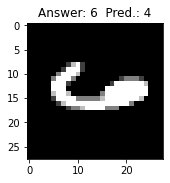

no. 24 id: 444


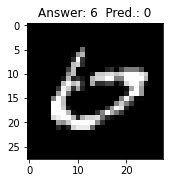

no. 25 id: 9667


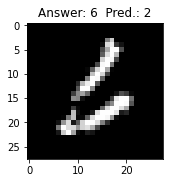

no. 26 id: 4814


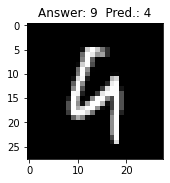

no. 27 id: 1244


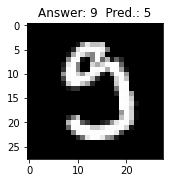

In [42]:
plt.rcParams["figure.figsize"] = [2.5, 2.5]

count = 0
for ind in only_ADAM:
    print('no.', count, 'id:', ind); count = count + 1
    test_img = refined_test_x[ind]
    tx = np.expand_dims(refined_test_x[ind], axis=0)
    p = np.argmax(model(tx))
    y = np.argmax(refined_test_y[ind])
    plt.title('Answer: {}  Pred.: {}'.format(y, p))
    plt.imshow(test_img, cmap=plt.get_cmap('gray'))
    plt.show()

plt.rcParams["figure.figsize"] = [12,8]

<h1>Mistakes both SGD and ADAM make:</h1>

no. 0 id: 2592


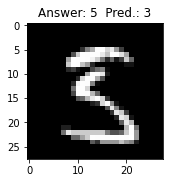

no. 1 id: 5927


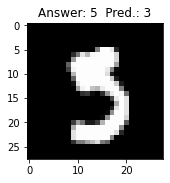

no. 2 id: 2115


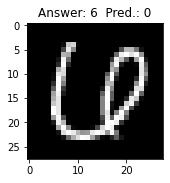

no. 3 id: 4169


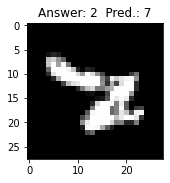

no. 4 id: 1898


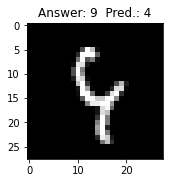

no. 5 id: 658


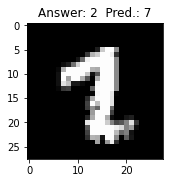

no. 6 id: 3219


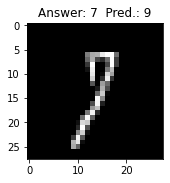

no. 7 id: 9631


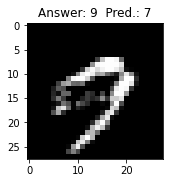

no. 8 id: 673


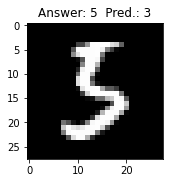

no. 9 id: 6566


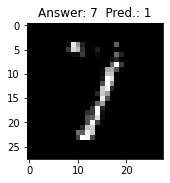

no. 10 id: 944


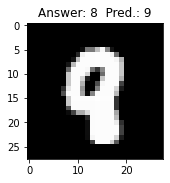

no. 11 id: 6587


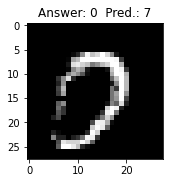

no. 12 id: 4805


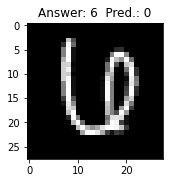

no. 13 id: 1229


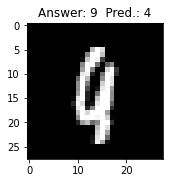

no. 14 id: 8397


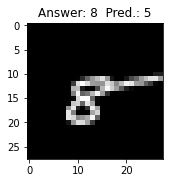

no. 15 id: 4071


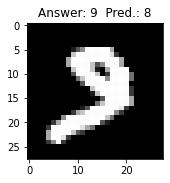

no. 16 id: 2032


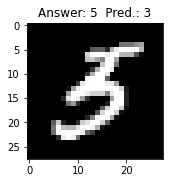

no. 17 id: 2289


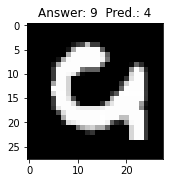

no. 18 id: 1011


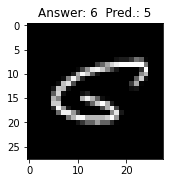

In [44]:
plt.rcParams["figure.figsize"] = [2.5, 2.5]

count = 0
for ind in both_SGD_ADAM:
    print('no.', count, 'id:', ind); count = count + 1
    test_img = refined_test_x[ind]
    tx = np.expand_dims(refined_test_x[ind], axis=0)
    p = np.argmax(model(tx))
    y = np.argmax(refined_test_y[ind])
    plt.title('Answer: {}  Pred.: {}'.format(y, p))
    plt.imshow(test_img, cmap=plt.get_cmap('gray'))
    plt.show()

plt.rcParams["figure.figsize"] = [12,8]

<h1>Conclusion:</h1>
<h2>Well, both my SGD and ADAM models are far from perfect (both 99.53% after removing weird pictures).</h2>
<h2>I think improvements can be made by experimenting with different layer designs, and differnt data expansion methods.</h2>
<h2>For right now, I will wrap this up and move on.</h2>